Depuis le site :
Nous avons collecté une base de données ophtalmologiques structurée de 5 000 patients avec l'âge, des photographies du fond d'œil en couleur de l'œil gauche et de l'œil droit et les mots-clés de diagnostic des médecins (en bref, ODIR-5K). 
Cet ensemble de données est un ensemble " réel " d'informations sur les patients recueillies par Shanggong Medical Technology Co. Ltd. dans différents hôpitaux et centres médicaux en Chine. Dans ces établissements, les images du fond d'œil sont capturées par différentes caméras du marché, telles que Canon, Zeiss et Kowa, ce qui donne des résolutions d'image variées. Les informations permettant d'identifier le patient sont supprimées. Les annotations sont étiquetées par des lecteurs humains formés, avec une gestion du contrôle de la qualité. 
Ils classent les patients en huit catégories : 
normal (N), 
diabète - Diabetes (D), 
glaucome - Glaucoma (G), 
cataracte - Cataract (C), 
AMD - DMLA (A) - Comprendre la dégénérescence maculaire liée à l'âge (DMLA) , Age-related Macular Degeneration 
hypertension - Hypertension (H), 
myopie - Myopia (M) 
Autres maladies/anomalies (O)
sur la base des images oculaires et de l'âge du patient. La publication de cet ensemble de données respecte les règles d'éthique et de confidentialité de la Chine. 
Le tableau 1 montre un enregistrement du jeu de données ODIR-5K.  Note : Dans le cycle de test, les mots-clés de diagnostic ne seront pas fournis.

Ocular Disease Intelligent Recognition (ODIR) is a structured ophthalmic database of 5,000 patients with age, color fundus photographs from left and right eyes and doctors' diagnostic keywords from doctors.
This dataset is meant to represent ‘‘real-life’’ set of patient information collected by Shanggong Medical Technology Co., Ltd. from different hospitals/medical centers in China. In these institutions, fundus images are captured by various cameras in the market, such as Canon, Zeiss and Kowa, resulting into varied image resolutions.Annotations were labeled by trained human readers with quality control management. They classify patient into eight labels including:
* Normal (N),
* Diabetes (D),
* Glaucoma (G),
* Cataract (C),
* Age related Macular Degeneration (A),
* Hypertension (H),
* Pathological Myopia (M),
* Other diseases/abnormalities (O)




Conditions de validation du projet

* Chargement et première exploration des données.
* Visualisation (avec transformations sur les données images).
* Modélisation d’un modèle de classification
* Analyse sémantique des images (Optionnel)
* Rapport + Demo




Special Explanation on ODIR-5K Database and Annotations

1. The annotated classification labels are determined by the following rules
   (1) The classification labels of one patient depends on left and right fundus images and corresponding diagnosis keywords;
   (2) One patient is classified as normal if and only if both left and right diagnosis keywords are "normal fundus";	 
   (3) The classification labels are decided by the other fundus image when one of fundus images is marked as "normal fundus";
   (4) Treat all suspected diseases or abnormalities as diagnosed diseases or abnormalities. 

2. Special words that appeared in diagnostic keywords	
    (1) The appearance of the two keywords "anterior segment image" and "no fundus image" are not classified into any of the eight categories in this competition.
       For example, there are two anterior segment images in ODIR-5K database, 1706_left.jpg and 1710_right.jpg. 
	In this case, the patient's classification labels are only judged by the other fundus image of the same patient.
	In addition, it is very important to note that the diagnostic keyword for 4580_left.jpg image is "no fundus image".
	Because this image is actually not the left fundus image of this patient, it is from a rotation of right fundus image.
	The introduction of these two diagnostic keywords can also be one of the challenges in this competition. 
   (2) The keywords "lens dust", "optic disk photographically invisible", "low image quality" and "image offset" do not play a decisive role in determining patient's labels.

3. The background of the following images is quite different from the rest ones. They are fundus images uploaded from the hospital. 
	   We are sure that these images are preprocessed. You can decide by yourself whether or not to train these images in the model. 
	   These images include
		2174_right.jpg
		2175_left.jpg
		2176_left.jpg
		2177_left.jpg
		2177_right.jpg
		2178_right.jpg
		2179_left.jpg
		2179_right.jpg
		2180_left.jpg
		2180_right.jpg
		2181_left.jpg
		2181_right.jpg
		2182_left.jpg
		2182_right.jpg
		2957_left.jpg
		2957_right.jpg



In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


#Tensorflow + GPU

In [ ]:
!pip install --upgrade tensorflow
#!pip install tensorflow==2.9.1

In [ ]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Mon_Oct_12_20:09:46_PDT_2020
Cuda compilation tools, release 11.1, V11.1.105
Build cuda_11.1.TC455_06.29190527_0


In [ ]:
import sys
print (sys.version)
# 3.6.4 |Anaconda custom (64-bit)| (default, Jan 16 2018, 10:22:32) [MSC v.1900 64 bit (AMD64)]
import tensorflow as tf
print(tf.__version__)

3.7.13 (default, Apr 24 2022, 01:04:09) 
[GCC 7.5.0]
2.8.2


In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Wed Sep  7 09:18:11 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P0    27W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 27.3 gigabytes of available RAM

You are using a high-RAM runtime!


In [ ]:
from tensorflow.python.client import device_lib
def get_available_devices():
    local_device_protos = device_lib.list_local_devices()
    return [x.name for x in local_device_protos]
print(get_available_devices())

['/device:CPU:0', '/device:GPU:0']


In [ ]:
import tensorflow as tf
if tf.test.is_built_with_cuda():
      print("is_built_with_cuda")
if tf.test.is_built_with_gpu_support():
    print('is_built_with_gpu_support')
print('GPU device :', tf.test.gpu_device_name())

is_built_with_cuda
is_built_with_gpu_support
GPU device : /device:GPU:0


In [ ]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')

In [ ]:
if tf.test.is_built_with_cuda():
      print("is_built_with_cuda")
if tf.test.is_built_with_gpu_support():
    print('is_built_with_gpu_support')
print('GPU device :', tf.test.gpu_device_name())
tf.config.list_physical_devices('GPU')

is_built_with_cuda
is_built_with_gpu_support
GPU device : /device:GPU:0


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# Déclaration de constantes et import de modules

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
sns.set_theme()
import cv2


ROOT_PATH = '/content/drive/MyDrive/Colab Notebooks'
#ROOT_PATH = '.'
CSV_OUTPUT_PATH = ROOT_PATH + '/csv_output'
MODEL_OUTPUT_PATH = ROOT_PATH + '/model'
TESTING_IMAGE_PATH = ROOT_PATH+'/ODIR-5K_Testing_Images'
TESTING_IMAGE_CROPPED_PATH = ROOT_PATH+'/ODIR-5K_Testing_Images_Cropped'
TRAINING_IMAGE_PATH = ROOT_PATH+'/ODIR-5K_Training_Dataset'
TRAINING_IMAGE_CROPPED_PATH = ROOT_PATH+'/ODIR-5K_Training_Dataset_Cropped'
TRAINING_IMAGE_AUGMENTED_PATH = ROOT_PATH+'/ODIR-5K_Training_Dataset_Augmented'
TRAINING_IMAGE_UNIQUE_CLASS_AUGMENTED_PATH = ROOT_PATH+'/ODIR-5K_Training_Dataset_Unique_Class_Augmented'
TRAINING_IMAGE_CLASS_STRUCT_PATH = ROOT_PATH+'/ODIR-5K_Training_Dataset_Struct'
TESTING_IMAGE_CLASS_STRUCT_PATH = ROOT_PATH+'/ODIR-5K_Testing_Dataset_Struct'
CSV_FILE_PATH = ROOT_PATH + '/ODIR-5K_Training_Annotations(Updated)_V2.xlsx'


def mkdir_if_not(folder):
  if not os.path.exists(folder):
    os.mkdir(folder) 
def create_folders():
  mkdir_if_not(CSV_OUTPUT_PATH)
  mkdir_if_not(MODEL_OUTPUT_PATH)
  mkdir_if_not(TRAINING_IMAGE_CROPPED_PATH)
  mkdir_if_not(TRAINING_IMAGE_AUGMENTED_PATH)
  mkdir_if_not(TRAINING_IMAGE_UNIQUE_CLASS_AUGMENTED_PATH)
  
          
  

KEEP_ASPECT_RATIO  = False
# set the quality of the resultant jpeg to 100%
QUALITY = 100
IMAGE_WIDTH = 299
IMAGE_HEIGHT = 299
IMAGE_SIZE = 299

DIAGNOSIS_DICO = {
    '10000000': 'Normal (N)',
    '01000000': 'Diabletes (D)',
    '00100000': 'Glaucoma (G)',
    '00010000': 'Cataract (C)',
    '00001000': 'Age related Mac. Degen. (A)',
    '00000100': 'Hypertension (H)',
    '00000010': 'Pathological Myopia (M)',
    '00000001': 'Other diseases/abnormalities (O)'
}
DISEASE_CLASSES = ['Normal', 'Diabetes', 'Glaucoma', 'Cataract', 'AMD', 'Hypertension', 'Myopia', 'Others']

# dico = {'N' : '10000000',
#         'D' : '01000000',
#         'G' : '00100000',
#         'C' : '00010000',
#         'A' : '00001000',
#         'H' : '00000100',
#         'M' : '00000010',
#         '0' : '00000001'}

##Chargement du dataset

In [4]:

df = pd.read_excel(CSV_FILE_PATH)
df.head()


ID  Patient Age Patient Sex Left-Fundus Right-Fundus  \
0   0           69      Female  0_left.jpg  0_right.jpg   
1   1           57        Male  1_left.jpg  1_right.jpg   
2   2           42        Male  2_left.jpg  2_right.jpg   
3   3           66        Male  3_left.jpg  3_right.jpg   
4   4           53        Male  4_left.jpg  4_right.jpg   

                            Left-Diagnostic Keywords  \
0                                           cataract   
1                                      normal fundus   
2  laser spot，moderate non proliferative retinopathy   
3                                      normal fundus   
4                        macular epiretinal membrane   

                Right-Diagnostic Keywords  N  D  G  C  A  H  M  O  
0                           normal fundus  0  0  0  1  0  0  0  0  
1                           normal fundus  1  0  0  0  0  0  0  0  
2  moderate non proliferative retinopathy  0  1  0  0  0  0  0  1  
3         branch retinal artery occlusion  0  0  0  0  0  0  0  1  
4       mild nonproliferative retinopathy  0  1  0  0  0  0  0  1

# Preprocessing

## Image Cropping and resizing

---



In [ ]:
import cv2
import numpy as np
import PIL
from PIL import Image
from tqdm import tqdm

class ImageUtils:

    @staticmethod
    def remove_black_pixels(source_folder, destination_folder, file_name):
        if not os.path.exists(destination_folder):
            os.mkdir(destination_folder)

        # path image
        file = os.path.join(source_folder, file_name)

        #Lecture image
        image = cv2.imread(file)

        # Mask pour tous les pixels colorés
        mask = image > 0

        # les coo des pixels colorés.
        coordinates = np.argwhere(mask)

        # Chercher la bounding box des pixels qui ne sont pas noirs
        x0, y0, s0 = coordinates.min(axis=0)
        x1, y1, s1 = coordinates.max(axis=0) + 1

        # Cropped boounding box
        cropped = image[x0:x1, y0:y1]

        # l'image cropped
        file_cropped = os.path.join(destination_folder, file_name)
        cv2.imwrite(file_cropped, cropped)

    @staticmethod
    def resize_image(source_folder, destination_folder, image_width, image_height, quality, keep_aspect_ratio, file_name):
        file = os.path.join(source_folder, file_name)
        img = Image.open(file)
        if keep_aspect_ratio:
            # it will produce the same with-to-height ratio as the original image
            width_percentage = (image_width / float(img.size[0]))
            height_size = int((float(img.size[1]) * float(width_percentage)))
            img = img.resize((image_width, height_size), PIL.Image.ANTIALIAS)
        else:
            img = img.resize((image_width, image_height), PIL.Image.ANTIALIAS)

        img.save(os.path.join(destination_folder, file_name), optimize=True, quality=quality)


    @staticmethod
    def crop_all_images(source_folder, destination_folder):
        files = [f for f in os.listdir(source_folder) if os.path.isfile(os.path.join(source_folder, f))]
        pbar = tqdm(files)
        for file in pbar:
            pbar.set_description('Cropping image: ' + file)
            ImageUtils.remove_black_pixels(source_folder, destination_folder, file)

    @staticmethod
    def resize_all_images(source_folder, destination_folder, image_width, image_height, quality, keep_aspect_ratio):
        if not os.path.exists(destination_folder):
            os.mkdir(destination_folder)
        files = [f for f in os.listdir(source_folder) if os.path.isfile(os.path.join(source_folder, f))]
        pbar = tqdm(files)
        for file in tqdm(files):
            pbar.set_description('Resizing image: ' + file)
            ImageUtils.resize_image(source_folder, destination_folder, image_width, image_height, quality, keep_aspect_ratio, file_name=file)






### **Crop and resize  all Trainning images**

In [ ]:
#Training images
def crop_all_images(source_folder, destination_folder):
    ImageUtils.crop_all_images(source_folder, destination_folder)
 

def resize_all_images(source_folder, destination_folder, image_width, image_height, quality, keep_aspect_ratio):
    ImageUtils.resize_all_images(source_folder, destination_folder, image_width, image_height, quality, keep_aspect_ratio)

source_folder = TRAINING_IMAGE_PATH
destination_folder = TRAINING_IMAGE_CROPPED_PATH

crop_all_images(source_folder, destination_folder)

source_folder = TRAINING_IMAGE_CROPPED_PATH
destination_folder = TRAINING_IMAGE_CROPPED_PATH + '_' + str(IMAGE_WIDTH)
keep_aspect_ratio = KEEP_ASPECT_RATIO
quality = QUALITY
#Uncomment if use this functionality
#resize_all_images(source_folder, destination_folder, IMAGE_WIDTH, IMAGE_WIDTH, quality, keep_aspect_ratio)

Resizing image: 2180_left.jpg:   0%|          | 0/7003 [11:13<?, ?it/s]


## Dataset reconstitution

### Diagnostic class

---



La classe Diagnostic est utilisée pour écarter ou non une image du dataset d'origine selon les différents mots clés par fond d'oeil
*  Keyword est décisif ou pas dans l'établissemnt du diagnostic (cf is_decisive)
*   Image de bonne ou mauvaise qualité (is_blacklisted_image)
*   Keyword qui ne permet pas de classifier une image (is_blacklisted_keyword)

In [53]:
import functools # for split

class Diagnostic:
    # '10000000': 'Normal (N)',
    # '01000000': 'Diabletes (D)',
    # '00100000': 'Glaucoma (G)',
    # '00010000': 'Cataract (C)',
    # '00001000': 'Age related Mac. Degen. (A)',
    # '00000100': 'Hypertension (H)',
    # '00000010': 'Pathological Myopia (M)',
    # '00000001': 'Other diseases/abnormalities (O)'

    DIAGNOSIS_KEYWORD_DICT = {
            0: ['normal fundus'],
            1: ['diabetic retinopathy', 'proliferative retinopathy'],
            2: ['glaucoma'],
            3: ['cataract'],
            4: ['macular degeneration'],
            5: ['hypertensive retinopathy'],
            6: ['myopi']
        }
    DISEASE_CLASSES = ['Normal', 'Diabetes', 'Glaucoma', 'Cataract', 'AMD', 'Hypertension', 'Myopia', 'Others']
    DIAGNOSTIC_ZERO_VECTOR = [0, 0, 0, 0, 0, 0, 0, 0]

    def __init__(self):
      pass

    @staticmethod
    def is_decisive(diagnostic_keyword):
        #  The keywords “lens dust”, “optic disk photographically invisible”, “low image quality”
        #  and “image offset” do not play a decisive role in determining patient’s labels.
        not_decisive_keywords = ["lens dust", "optic disk photographically invisible", "low image quality", "image offset"]
        return not (diagnostic_keyword in not_decisive_keywords)

    @staticmethod
    def is_blacklisted_keyword(diagnostic_keyword):
        # The appearance of the two keywords “anterior segment image” and “no fundus image” are not classified into any of the eight categories in this
        # competition. For example, there are two anterior segment images in ODIR-5K database, 1706_left.jpg and 1710_right.jpg.
        # In this case, the patient’s classification labels are only judged by the other fundus image of the same patient.
        # In addition, it is very important to note that the diagnostic keyword for 4580_left.jpg image is “no fundus image”.
        blacklist_keywords = ["anterior segment image", "no fundus image"]
        return diagnostic_keyword in blacklist_keywords

    @staticmethod
    def is_blacklisted_image(image_name):
        # The background of the following images is quite different from the rest ones. They are fundus images uploaded from the hospital.
        # We are sure that these images are preprocessed. You decide do not train these images in the model
        blacklist_images = {'2174_right.jpg', '2175_left.jpg', '2176_left.jpg', '2177_left.jpg', '2177_right.jpg',
                     '2178_right.jpg', '2179_left.jpg', '2179_right.jpg', '2180_left.jpg', '2180_right.jpg',
                     '2181_left.jpg', '2181_right.jpg', '2182_left.jpg', '2182_right.jpg', '2957_left.jpg',
                     '2957_right.jpg'}
        return image_name in blacklist_images

    @staticmethod
    def is_in_keyword(keywords, keyword):
        for k in keywords:
            if k in keyword:
                return True
        return False

    def match_diagnosis_patient_label(self, keyword):
        for key in Diagnostic.DIAGNOSIS_KEYWORD_DICT:
            keywords = Diagnostic.DIAGNOSIS_KEYWORD_DICT[key]
            if Diagnostic.is_in_keyword(keywords, keyword):
              return key
        return -1



    def compute_diagnosis_vector(self, keywords):
        # Split les keywords dans une liste de keyword
        # Keywords = moderate non proliferative retinopathy，hypertensive retinopathy
        # liste de keywords : 
        # [0] = moderate non proliferative retinopathy
        # [1] = hypertensive retinopathy
        # Essaye de ressortir un diagnostic qui match à partir de la liste des keywords
        # et de générer un vecteur diagnostic du même format que l'original
        # return [0,1,0,0,0,0,0,0] or [0,0,0,0,0,0,0,0] elsewhere
        replacements = ('，', ',')
        keywords = functools.reduce(lambda s, sep: s.replace(sep, ';'), replacements, keywords)
        # diagnostic_keywords = [x.strip() for x in keywords.split(['，', ','])]
        diagnostic_keywords = [x.strip() for x in keywords.split(';')]
        diagnostic_vector = [0, 0, 0, 0, 0, 0, 0, 0]

        for diagnostic_keyword in diagnostic_keywords:
            #print('diagnostic_keyword ', diagnostic_keyword)
            if self.is_blacklisted_keyword(diagnostic_keyword) or not self.is_decisive(diagnostic_keyword):
              return Diagnostic.DIAGNOSTIC_ZERO_VECTOR
            patient_label = self.match_diagnosis_patient_label(diagnostic_keyword)
            if patient_label >= 0:
                diagnostic_vector[patient_label] = 1
            else:
                diagnostic_vector[7] = 1
        return diagnostic_vector

    
    def get_diagnosis_labels(self, diagnosis_vector):
        normal = diagnosis_vector[0]
        diabetes = diagnosis_vector[1]
        glaucoma = diagnosis_vector[2]
        cataract = diagnosis_vector[3]
        amd = diagnosis_vector[4]
        hypertension = diagnosis_vector[5]
        myopia = diagnosis_vector[6]
        others = diagnosis_vector[7]
        return normal, diabetes, glaucoma, cataract, amd, hypertension, myopia, others, normal + diabetes + glaucoma + cataract + amd + hypertension + myopia + others

    
    def get_combined_diagnosis_vector(self, left_vector, right_vector):
        diagnostic_vector = [0, 0, 0, 0, 0, 0, 0, 0]
        if left_vector[0] and right_vector[0]:
            diagnostic_vector[0] = 1
        diagnostic_vector[1] = left_vector[1] or right_vector[1]
        diagnostic_vector[2] = left_vector[2] or right_vector[2]
        diagnostic_vector[3] = left_vector[3] or right_vector[3]
        diagnostic_vector[4] = left_vector[4] or right_vector[4]
        diagnostic_vector[5] = left_vector[5] or right_vector[5]
        diagnostic_vector[6] = left_vector[6] or right_vector[6]
        diagnostic_vector[7] = left_vector[7] or right_vector[7]
        return diagnostic_vector

    
    def write_diagnostic_csv_row(self, csv_file_writer, fundus, age, sex, diagnosis_vector):

        normal, diabetes, glaucoma, cataract, amd, hypertension, myopia, others, _ =  self.get_diagnosis_labels(diagnosis_vector)
        if age is not None and sex is not None:
          csv_file_writer.writerow([fundus, age, sex, normal, diabetes, glaucoma, cataract, amd, hypertension, myopia,
                                  others])
        else:
          csv_file_writer.writerow([fundus, normal, diabetes, glaucoma, cataract, amd, hypertension, myopia,
                                  others])
    
    def compute_class_name(self, diagnosis_vector):
        normal, diabetes, glaucoma, cataract, amd, hypertension, myopia, others, sum_disease =  self.get_diagnosis_labels(diagnosis_vector)
        # Seulement si le label est unique sinon on écarte l'image
        disease_class = -1
        if sum_disease == 1:
            if normal == 1:
                disease_class = Diagnostic.DISEASE_CLASSES.index('Normal')
            elif diabetes == 1:
                 disease_class = Diagnostic.DISEASE_CLASSES.index('Diabetes')
            elif glaucoma == 1:
                disease_class = Diagnostic.DISEASE_CLASSES.index('Glaucoma')
            elif cataract == 1:
                disease_class = Diagnostic.DISEASE_CLASSES.index('Cataract')
            elif amd == 1:
                disease_class = Diagnostic.DISEASE_CLASSES.index('AMD')
            elif hypertension == 1:
                disease_class = Diagnostic.DISEASE_CLASSES.index('Hypertension')
            elif myopia == 1:
                disease_class = Diagnostic.DISEASE_CLASSES.index('Myopia')
            elif others == 1:
                disease_class = Diagnostic.DISEASE_CLASSES.index('Others')
        return normal, diabetes, glaucoma, cataract, amd, hypertension, myopia, others, disease_class
        
   
    def write_diagnostic_class_csv(self, csv_file_writer, fundus, diagnosis_vector):
        # Seulement si le label est unique sinon on écarte l'image
        normal, diabetes, glaucoma, cataract, amd, hypertension, myopia, others, disease_class = self.compute_class_name(diagnosis_vector)
        if disease_class != -1:
            csv_file_writer.writerow([fundus, normal, diabetes, glaucoma, cataract, amd, hypertension, myopia, others, disease_class])
            return True
        return False




### Patient class

---



Cette classe permet de regénérer un patient à partir des données d'entrées

In [51]:
class Patient:

    def __init__(self, patient_id, age, sex, eye_side, eye_fundus_image_path, keywords, diagnosis_original_vector):
        self.id = patient_id
        self.age = age
        self.sex = sex
        self.eye_side = eye_side # 'left' or 'right'
        self.eye_fundus_image_path = eye_fundus_image_path
        self.diagnostic_keywords = keywords
        self.diagnosis_original_vector = diagnosis_original_vector
        self.diagnosis_computed_vector = []

    def set_diagnosis_computed_vector(self, diagnosis_vector):
        self.diagnosis_computed_vector = diagnosis_vector

    def __str__(self) -> str:
      s = r'id {}'.format(self.id)
      s += '\n'
      s += r'age {}'.format(self.age)
      s += '\n'
      s += r'sex {}'.format(self.sex)
      s += '\n'
      s += r'eye {}'.format(self.eye_side)
      s += '\n'
      s += r'image  {}'.format(self.eye_fundus_image_path)
      s += '\n'
      s += r'diagnostic {}'.format(self.diagnostic_keywords)
      s += '\n'
      s += r'diagnosis_original_vector {}'.format(self.diagnosis_original_vector)
      s += '\n'
      s += r'diagnosis_computed_vector {}'.format(self.diagnosis_computed_vector)
      s += '\n'
      return s





### OdirDataset class

Permet de régénérer le dataset à partir du dataset d'origine par fond d'oeil

In [52]:
import csv
from tqdm import tqdm

class ODIRDataset:
    def __init__(self, dataset, diagnostic):
        self.dataset = dataset
        self.diagnostic = diagnostic
        self.patients = {}


    @staticmethod
    def create_diagnosis_vector(dataset, index):
        diagnosis_vector = [0, 0, 0, 0, 0, 0, 0, 0]
        diagnosis_vector[0] = dataset['N'][index]
        diagnosis_vector[1] = dataset['D'][index]
        diagnosis_vector[2] = dataset['G'][index]
        diagnosis_vector[3] = dataset['C'][index]
        diagnosis_vector[4] = dataset['A'][index]
        diagnosis_vector[5] = dataset['H'][index]
        diagnosis_vector[6] = dataset['M'][index]
        diagnosis_vector[7] = dataset['O'][index]
        return  diagnosis_vector

   
    def create_patient(self, patient_id, age, sex, eye_side, eye_fundus_image_path, keywords, diagnosis_original_vector):

        # Calculer le diagnosis vector basé sur les keywords
        diagnosis_computed_vector = self.diagnostic.compute_diagnosis_vector(keywords)

        # Si vecteur calculé n'est pas que  zero et que l'image n'est pas blacklistée alors
        # Ajoute un patient au dictionnaire des patients
        # sinon return None
        if (np.count_nonzero(diagnosis_computed_vector) > 0) and not self.diagnostic.is_blacklisted_image(eye_fundus_image_path):
            patient = Patient(patient_id, age, sex, eye_side, eye_fundus_image_path, keywords, diagnosis_original_vector)
            patient.set_diagnosis_computed_vector(diagnosis_computed_vector)
            return patient
        return None

    def generate_patient(self, dataset, index, eye_side):
        patient_id = dataset['ID'][index]
        age = dataset['Patient Age'][index]
        sex = dataset['Patient Sex'][index]
        fundus = None
        keywords = None
        if eye_side == 'right': 
          fundus = dataset['Right-Fundus'][index]
          keywords = dataset['Right-Diagnostic Keywords'][index]
        else:
          fundus = dataset['Left-Fundus'][index]
          keywords = dataset['Left-Diagnostic Keywords'][index]

        diagnosis_original_vector = ODIRDataset.create_diagnosis_vector(dataset, index)

        patient = self.create_patient(patient_id, age, sex, eye_side, fundus, keywords, diagnosis_original_vector)
        return patient
    

    def generate_patients(self):

        for index in self.dataset.index:

          left_eye = self.generate_patient(self.dataset, index, 'left')
          if left_eye is not None:
              self.patients[left_eye.eye_fundus_image_path] = left_eye

          right_eye = self.generate_patient(self.dataset, index, 'right')
          if right_eye is not None:
              self.patients[right_eye.eye_fundus_image_path] = right_eye

        return self.patients

  

    def reconstruct_patient_eye_disease_csv(self, destination_folder, file_name='odir'):

        # Reconstruit le CSV patient avec les annotations pour chaque oeil
        if not os.path.exists(destination_folder):
            os.mkdir(destination_folder)
        csv_file = os.path.join(destination_folder, file_name+'.csv')
        with open(csv_file, 'w', newline='') as csv_file:
            file_writer = csv.writer(csv_file, delimiter=',', quotechar='|', quoting=csv.QUOTE_MINIMAL)
            file_writer.writerow(['ID', 'Normal', 'Diabetes', 'Glaucoma', 'Cataract', 'AMD', 'Hypertension',
                                  'Myopia', 'Others'])
            for index in self.dataset.index:
                left_fundus = self.dataset['Left-Fundus'][index]
                right_fundus = self.dataset['Right-Fundus'][index]

                # Check si left eye exists in the dictionary
                if left_fundus in self.patients:
                    self.diagnostic.write_diagnostic_csv_row(file_writer, left_fundus, None, None, self.patients[left_fundus].diagnosis_computed_vector)

                # Check si the Right eye exists in the dictionary
                if right_fundus in self.patients:
                    self.diagnostic.write_diagnostic_csv_row(file_writer, right_fundus, None, None, self.patients[right_fundus].diagnosis_computed_vector)
    
    def reconstruct_odir_csv(self, destination_folder, file_name='odir_full'):

        # Reconstruit le CSV patient avec les annotations pour chaque oeil
        if not os.path.exists(destination_folder):
            os.mkdir(destination_folder)
        csv_file = os.path.join(destination_folder, file_name+'.csv')
        with open(csv_file, 'w', newline='') as csv_file:
            file_writer = csv.writer(csv_file, delimiter=',', quotechar='|', quoting=csv.QUOTE_MINIMAL)
            file_writer.writerow(['ID', 'Age', 'Sex', 'Normal', 'Diabetes', 'Glaucoma', 'Cataract', 'AMD', 'Hypertension',
                                  'Myopia', 'Others'])
            for index in self.dataset.index:
                left_fundus = self.dataset['Left-Fundus'][index]
                right_fundus = self.dataset['Right-Fundus'][index]

                # Check si left eye exists in the dictionary
                if left_fundus in self.patients:
                    self.diagnostic.write_diagnostic_csv_row(file_writer, left_fundus, self.patients[left_fundus].age, self.patients[left_fundus].sex, self.patients[left_fundus].diagnosis_computed_vector)

                # Check si the Right eye exists in the dictionary
                if right_fundus in self.patients:
                    self.diagnostic.write_diagnostic_csv_row(file_writer, right_fundus, self.patients[right_fundus].age, self.patients[right_fundus].sex, self.patients[right_fundus].diagnosis_computed_vector)
                        

    def generate_patient_eye_disease_unique_class_csv(self, destination_folder, file_name='odir_classes'):
        # On écrit les lignes pour lesquelles il y a qu'un diagnostique unique avec image du fundus et la classe du diagnostique
        if not os.path.exists(destination_folder):
            os.mkdir(destination_folder)
        csv_file = os.path.join(destination_folder, file_name+'.csv')

        # Ecarte toutes les images qui ont des mult-labels
        with open(csv_file, 'w', newline='') as csv_file:
            file_writer = csv.writer(csv_file, delimiter=',', quotechar='|', quoting=csv.QUOTE_MINIMAL)
            file_writer.writerow(['ID', 'Normal', 'Diabetes', 'Glaucoma', 'Cataract', 'AMD', 'Hypertension',
                                  'Myopia', 'Others', 'Label'])
            for index in self.dataset.index:
                left_fundus = self.dataset['Left-Fundus'][index]
                right_fundus = self.dataset['Right-Fundus'][index]

                # Check if the Left eye exists in the dictionary
                if left_fundus in self.patients:
                    _ = self.diagnostic.write_diagnostic_class_csv(file_writer, left_fundus, self.patients[left_fundus].diagnosis_computed_vector)

                # Check if the Right eye exists in the dictionary
                if right_fundus in self.patients:
                    _ = self.diagnostic.write_diagnostic_class_csv(file_writer, right_fundus, self.patients[right_fundus].diagnosis_computed_vector)



### ODIRClassStructGenerator class

---



Permet de créer la strutcture folder par classe diagnostic et de dispatcher les images par type de classe. </br>
***Non Utilisée***

In [ ]:
from tqdm import tqdm
import os, shutil, pathlib, fnmatch

class ODIRClassStructGenerator:
    def __init__(self, dataset_classes, column_names, disease_classes):
        self.logger = logging.getLogger('odir_class_struct')
        self.dataset_classes = dataset_classes
        self.disease_classes = disease_classes
        self.column_names = column_names

    def create_class_structure(self, struct_root_path):
        if not os.path.exists(struct_root_path):
            os.mkdir(struct_root_path)
            self.logger.info('folder struct_root_path created %s', struct_root_path)
        else:
            self.logger.info('class structure already exist')
            return False

        # create all class directories
        for c in self.disease_classes:
            cl_name = str(c)
            cl_dir_name = os.path.join(struct_root_path, cl_name)
            if not os.path.exists(cl_dir_name):
                os.mkdir(cl_dir_name)
                self.logger.info('folder class created %s', cl_dir_name)
        return True


    def create_data_generator_structure(self, images_source_folder, struct_root_path):

        self.create_class_structure(struct_root_path)

        image_count_indices = np.zeros(9, dtype=int)

        self.logger.info('start creation of image struct')
        for index in tqdm(self.dataset_classes.index):
            img_file_name = self.dataset_classes.loc[index][self.column_names[0]]
            img_file_path = os.path.join(images_source_folder, img_file_name)

            # create image file dst
            label_as_int = self.dataset_classes.loc[index][self.column_names[1]]
            #label_as_int = to_label(label_as_str)
            #print(label_as_int)
            img_count_index = image_count_indices[label_as_int]

            # dst_img_file = str(label_as_int) + '_image_' + str(img_count_index) + '.jpg'
            dst_img_file = img_file_name

            img_dst = self.disease_classes[label_as_int] # 'class_' + str(label_as_int)
            img_dst_path = os.path.join(struct_root_path, img_dst)
            # increment index
            image_count_indices[label_as_int] = img_count_index + 1
            img_dst_file_path = os.path.join(img_dst_path, dst_img_file)
            shutil.copy2(img_file_path, img_dst_file_path)
        self.logger.info('end creation of image struct')

    @staticmethod
    def one_hot(label_as_str):
        return np.array(list(label_as_str), dtype=int)

    @staticmethod
    def from_one_hot(label):
        list_of_ints = list(label)
        key = ''.join(str(e) for e in list_of_ints)
        return DIAGNOSIS_DICO[key]

    @staticmethod
    def to_label(label_as_str):
        return label_as_str.index('1')

    @staticmethod
    def move_dir(src: str, dst: str, pattern: str = '*'):
      if not os.path.isdir(dst):
        pathlib.Path(dst).mkdir(parents=True, exist_ok=True)
      for f in fnmatch.filter(os.listdir(src), pattern):
        shutil.move(os.path.join(src, f), os.path.join(dst, f))

### Génération des fichiers CSV - odir_classes.csv -


In [54]:
import time
import logging
import logging.config

logging.config.fileConfig(ROOT_PATH + '/logging.conf')

start = time.time()
print('Produire toutes les informations des patients (eye fundus) et génère un dictionnaire de patient')

odir = ODIRDataset(df, Diagnostic())
print('Génération des Patients Started #########################################')
patients = odir.generate_patients()
print('Génération des Patients Finished #########################################')

print('Reconstruit le csv disease unique class Started #########################################')
odir.generate_patient_eye_disease_unique_class_csv(CSV_OUTPUT_PATH)
print('Reconstruit le csv disease unique class Data Finished ########################################')


print('Reconstruit le csv disease Started #########################################')
odir.reconstruct_patient_eye_disease_csv(CSV_OUTPUT_PATH)
print('Reconstruit le csv disease Data Finished ########################################')

print('Reconstruit le csv full Started #########################################')
odir.reconstruct_odir_csv(CSV_OUTPUT_PATH)
print('Reconstruit le csv full Data Finished ########################################')

end = time.time()
print('Done  ' + str(end - start) + ' seconds')


Produire toutes les informations des patients (eye fundus) et génère un dictionnaire de patient
Génération des Patients Started #########################################
Génération des Patients Finished #########################################
Reconstruit le csv disease unique class Started #########################################
Reconstruit le csv disease unique class Data Finished ########################################
Reconstruit le csv disease Started #########################################
Reconstruit le csv disease Data Finished ########################################
Reconstruit le csv full Started #########################################
Reconstruit le csv full Data Finished ########################################
Done  1.0260279178619385 seconds


# Annotation preprocessing

In [8]:
odir_classes_df = pd.read_csv(CSV_OUTPUT_PATH+'/odir_classes.csv')
odir_classes_df.head()


ID  Normal  Diabetes  Glaucoma  Cataract  AMD  Hypertension  \
0   0_left.jpg       0         0         0         1    0             0   
1  0_right.jpg       1         0         0         0    0             0   
2   1_left.jpg       1         0         0         0    0             0   
3  1_right.jpg       1         0         0         0    0             0   
4  2_right.jpg       0         1         0         0    0             0   

   Myopia  Others  Label  
0       0       0      3  
1       0       0      0  
2       0       0      0  
3       0       0      0  
4       0       0      1

In [42]:
odir_df_augmented = OdirDataframe.create_multiclass_dataframe()
odir_df_augmented.all_df.head()

ID  Normal  Diabetes  \
0  /content/drive/MyDrive/Colab Notebooks/ODIR-5K...       0         0   
1  /content/drive/MyDrive/Colab Notebooks/ODIR-5K...       1         0   
2  /content/drive/MyDrive/Colab Notebooks/ODIR-5K...       1         0   
3  /content/drive/MyDrive/Colab Notebooks/ODIR-5K...       1         0   
4  /content/drive/MyDrive/Colab Notebooks/ODIR-5K...       0         1   

   Glaucoma  Cataract  AMD  Hypertension  Myopia  Others Label  
0         0         1    0             0       0       0     3  
1         0         0    0             0       0       0     0  
2         0         0    0             0       0       0     0  
3         0         0    0             0       0       0     0  
4         0         0    0             0       0       0     1

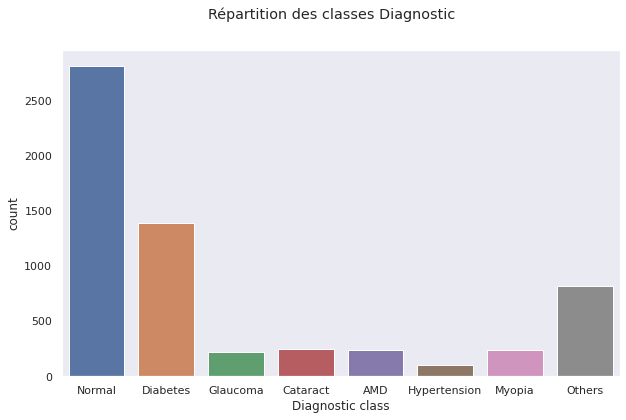

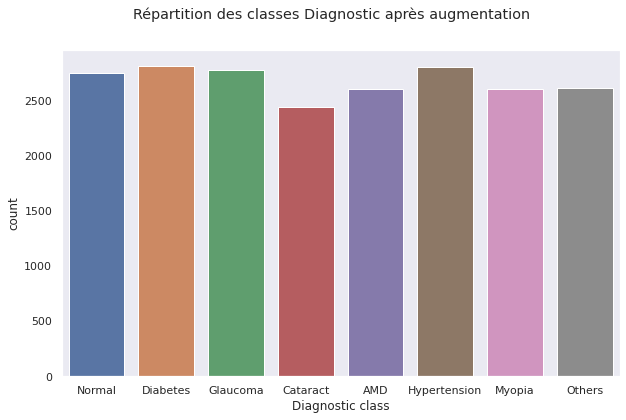

In [45]:
#dict = {'Label': {0:'Normal', 1:'Diabetes', 2:'Glaucoma', 3:'Cataract', 4:'AMD', 5:'Hypertension', 6:'Myopia', 7:'Others'}}
from seaborn import axes_style
def count_plot(df, title):
  with axes_style({'axes.grid': False}):
    plt.figure(figsize=(10, 6))
    plt.suptitle(title)
    ax = sns.countplot(x='Label', data=df)
    ax.set_xticklabels(DISEASE_CLASSES)
    ax.set_xlabel("Diagnostic class")
  plt.show();

count_plot(odir_classes_df, 'Répartition des classes Diagnostic')

count_plot(odir_df_augmented.all_df, 'Répartition des classes Diagnostic après augmentation')

In [37]:
# discaded images 
odir_discaded_images__df = pd.read_csv(CSV_OUTPUT_PATH+'/odir_discard_images.csv')
#odir_discaded_images__df.fillna('-').head()
print(odir_discaded_images__df['Left-Fundus'].count())
print(odir_discaded_images__df['Right-Fundus'].count())
odir_discaded_images__df.info()

230
220
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ID            302 non-null    int64 
 1   Left-Fundus   230 non-null    object
 2   Right-Fundus  220 non-null    object
dtypes: int64(1), object(2)
memory usage: 7.2+ KB


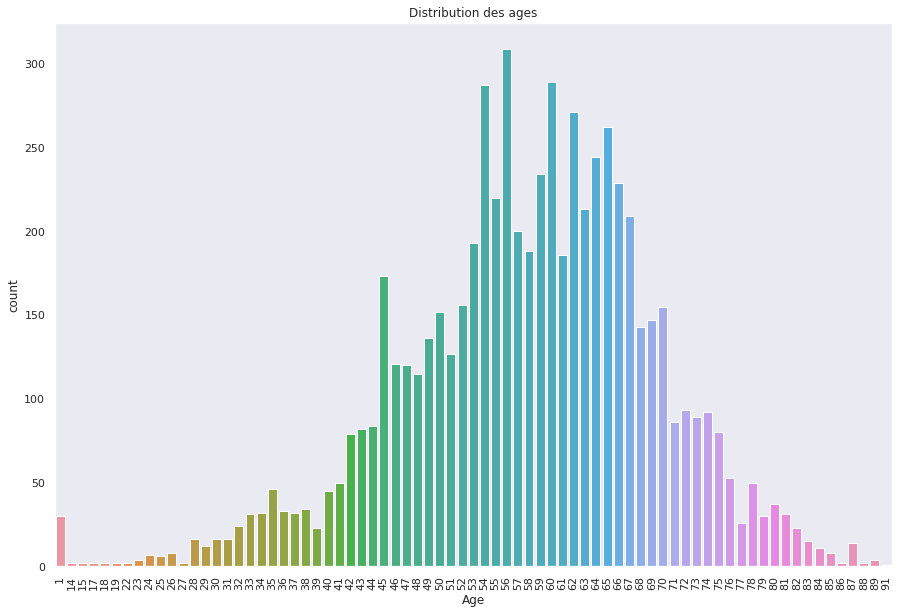

In [58]:
# distribution de la maladie par  age
odir__df = pd.read_csv(CSV_OUTPUT_PATH+'/odir_full.csv')
#odir__df.head()
with axes_style({'axes.grid': False}):
  fig, ax = plt.subplots(1, 1, figsize=(15, 10))
  sns.countplot(ax=ax, x='Age', data=odir__df);
  plt.xticks(rotation=90)
  ax.set_title('Distribution des ages')
plt.show();

## Data Augmentation

### ImageFx class

In [ ]:
import numpy as np
import tensorflow as tf
from skimage import exposure
import matplotlib.pyplot as plt
import os
import random
import cv2

class ImageFx:



    def __init__(self, image_size):
        self.image_size = image_size
        #self.tranforms = [{'method' : 'crop_to_bounding_box', 'args': 'offset_height']


    def zooming(self, cv_image, zoom_range=(0.5, 0.5)):
        image = np.asarray(cv_image, dtype=np.float32)
        image = tf.keras.preprocessing.image.random_zoom(image, zoom_range=zoom_range, row_axis=0, col_axis=1, channel_axis=2, fill_mode='constant', cval=0.0, interpolation_order=1)
        image = np.array(image, dtype=np.uint8)
        return image

    def brightness(self, image, delta):
        image = tf.image.adjust_brightness(image, delta)
        image = np.array(image, dtype=np.uint8)
        return image

    def rescale_intensity(self, cv_image, q=(2, 98)):
        p0, pn = np.percentile(cv_image, q)
        image = exposure.rescale_intensity(cv_image, in_range=(p0, pn))
        return image

    def contrast(self, cv_image, contrast_factor=2):
        image = tf.image.adjust_contrast(cv_image, contrast_factor)
        image = np.array(image, dtype=np.uint8)
        return image

    def saturation(self, cv_image, saturation_factor=0.5):
        image = tf.image.adjust_saturation(cv_image, saturation_factor)
        image = np.array(image, dtype=np.uint8)
        return image

    def gamma(self, cv_image, gamma=0.5):
        image = tf.image.adjust_gamma(cv_image, gamma)
        image = np.array(image, dtype=np.uint8)
        return image

    def hue(self, cv_image, delta=0.2):
        image = tf.image.adjust_hue(cv_image, delta)
        image = np.array(image, dtype=np.uint8)
        return image

    def crop_to_bounding_box(self, cv_image, offset_height, offset_width, target_height, target_width):
        image = tf.image.crop_to_bounding_box(cv_image, offset_height, offset_width, target_height, target_width)
        image = tf.image.resize(image, (self.image_size, self.image_size))
        image = np.array(image, dtype=np.uint8)
        return image

    def rot90(self, cv_image, k):
        image = tf.image.rot90(cv_image, k)
        image = np.array(image, dtype=np.uint8)
        return image

    def flip_left_right(self, cv_image):
        image = tf.image.flip_left_right(cv_image)
        image = np.array(image, dtype=np.uint8)
        return image

    def flip_up_down(self, cv_image):
        image = tf.image.flip_up_down(cv_image)
        image = np.array(image, dtype=np.uint8)
        return image

    def central_crop(self, cv_image, central_fraction):
        image = tf.image.central_crop(cv_image, central_fraction)
        image = np.array(image, dtype=np.uint8)
        return image

    def random_crop(self, cv_image, window_size):
        max_allowed_size = np.min(cv_image.shape[:2])
        if window_size>max_allowed_size:
            return self.random_crop(cv_image, int(window_size/1.5))
        else :
            size = np.random.randint(window_size, max_allowed_size)
        max_width = cv_image.shape[0] - size - 1
        max_height = cv_image.shape[1] - size - 1
        left = 0 if (max_width <= 1)  else np.random.randint(0, max_width)
        top  = 0 if (max_height <= 1) else np.random.randint(0, max_height)
        image = tf.image.crop_to_bounding_box(cv_image, top, left, size, size)
        return image
        #return cv_image[left:left+size, top:top+size]

    def random_crop_and_resize(self, cv_image, resize_image, window_size=150):
        image = self.random_crop(cv_image, window_size)
        if resize_image:
          image = tf.image.resize(image, (self.image_size, self.image_size))
          image = np.array(image, dtype=np.uint8)
        return image

    #plt.imshow(open_background(background_image[3], resize=(256,256), WINDOW_SIZE=100))

    # def random_rotation(self, cv_image, k):
    #    tf.keras.preprocessing.image.random_rotation()

    # def sobel_edges(self, cv_image):
    #     image = tf.image.sobel_edges(cv_image)
    #     image = np.array(image, dtype=np.uint8)
    #     return image



    def random_tranform(self, cv_image, index):
        output_image = None
        tranform_name = ''
        if index == 0:
            image_mid_size = int(self.image_size/2.0)
            output_image = self.crop_to_bounding_box(cv_image, 0, 0, image_mid_size, image_mid_size)
            tranform_name = f'crop_to_bounding_box = {0, 0, image_mid_size, image_mid_size}'
        elif index == 1:
            image_mid_size = int(self.image_size/2.0)
            output_image = self.crop_to_bounding_box(cv_image, image_mid_size, 0, image_mid_size, image_mid_size)
            tranform_name = f'crop_to_bounding_box = {image_mid_size, 0, image_mid_size, image_mid_size}'
        elif index == 2:
            image_mid_size = int(self.image_size/2.0)
            output_image = self.crop_to_bounding_box(cv_image, 0, image_mid_size, image_mid_size, image_mid_size)
            tranform_name = f'crop_to_bounding_box = {0, image_mid_size, image_mid_size, image_mid_size}'
        elif index == 3:
            image_mid_size = int(self.image_size/2.0)
            output_image = self.crop_to_bounding_box(cv_image, image_mid_size, image_mid_size, image_mid_size, image_mid_size)
            tranform_name = f'crop_to_bounding_box = {image_mid_size, image_mid_size, image_mid_size, image_mid_size}'
        elif index == 4:
            output_image = self.zooming(cv_image, (0.5, 0.5))
            tranform_name = f'zooming = (0.5, 0.5)'
        elif index == 5:
            output_image = self.zooming(cv_image, (0.7, 0.7))
            tranform_name = f'zooming = (0.7, 0.7)'
        elif index == 6:
            output_image = self.zooming(cv_image, (0.8, 0.8))
            tranform_name = f'zooming = (0.8, 0.8)'
        elif index == 7:
            output_image = self.zooming(cv_image, (0.9, 0.9))
            tranform_name = f'zooming = (0.9, 0.9)'
        elif index == 8:
            output_image = self.rescale_intensity(cv_image)
            tranform_name = f'rescale intensity = (2, 98)'
        elif index == 9:
            output_image = self.contrast(cv_image, 2)
            tranform_name = f'contrast : contrast_factor=2'
        elif index == 10:
            output_image = self.saturation(cv_image, 0.5)
            tranform_name = f'saturation : saturation_factor=0.5'
        elif index == 11:
            output_image = self.gamma(cv_image, 0.5)
            tranform_name = f'gamma : gamma=0.5'
        elif index == 12:
            output_image = self.hue(cv_image, 0.2)
            tranform_name = f'hue : hue=0.2'
        elif index == 13:
            output_image = self.flip_left_right(cv_image)
            tranform_name = f'flip_left_right'
        elif index == 14:
            output_image = self.rot90(cv_image, 1)
            tranform_name = f'rot90'
        elif index > 14:
            k = random.randint(2, 3)
            output_image = self.rot90(cv_image, k)
            index = random.randint(0, 13)
            tranform_name1 = 'rot90'
            output_image, tranform_name2 = self.random_tranform(output_image, index)
            tranform_name = tranform_name1 + '/' + tranform_name2

        return output_image, tranform_name




### ImageAugmentationDisplaySample class

image name to process : 2360_left.jpg


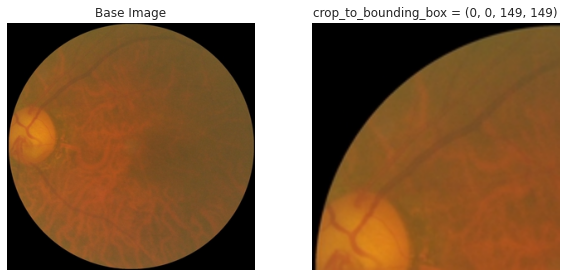

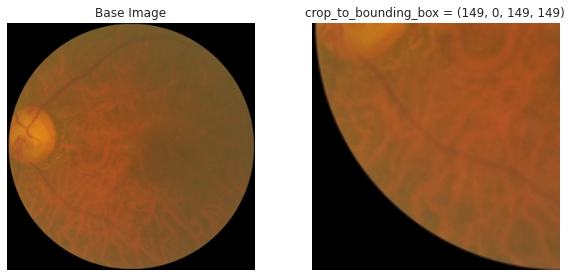

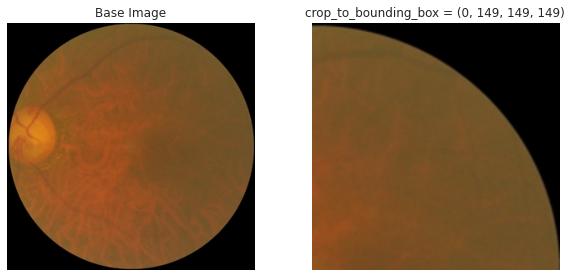

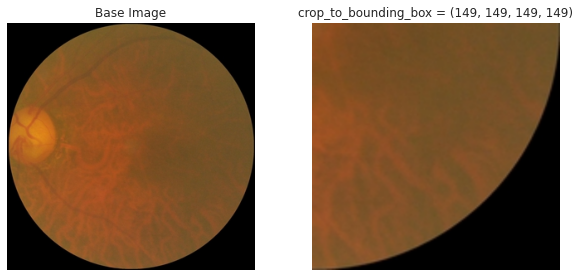

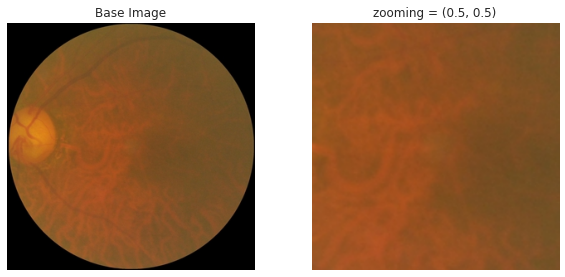

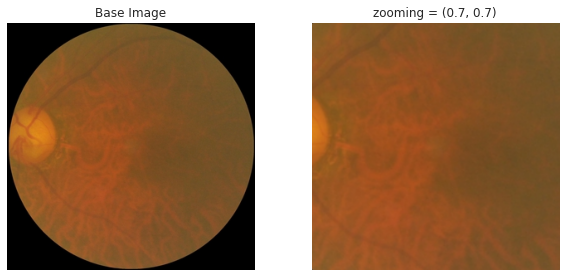

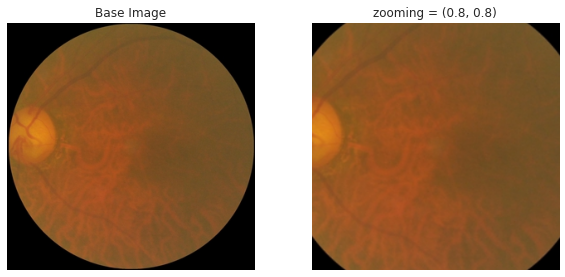

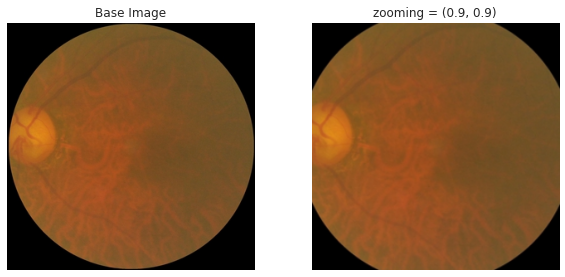

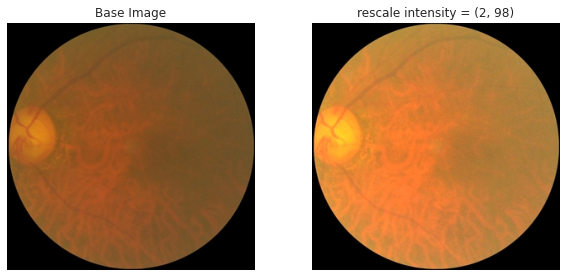

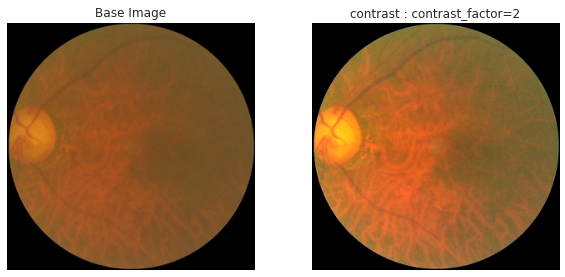

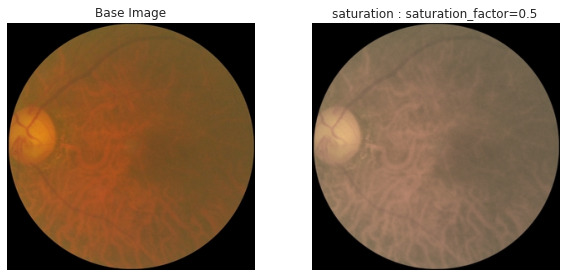

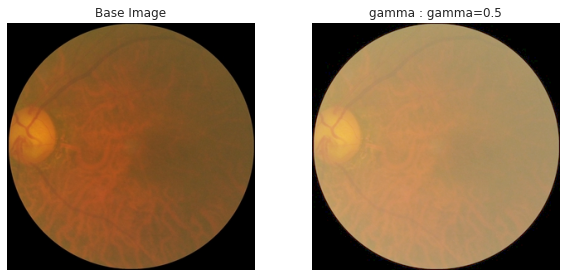

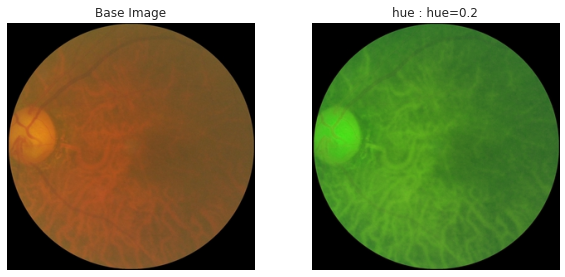

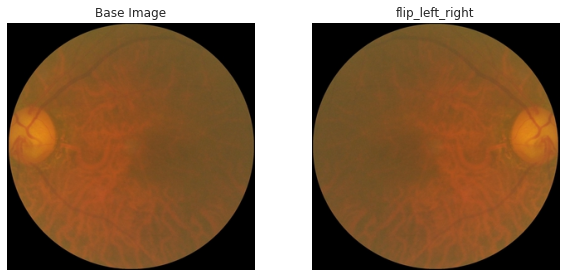

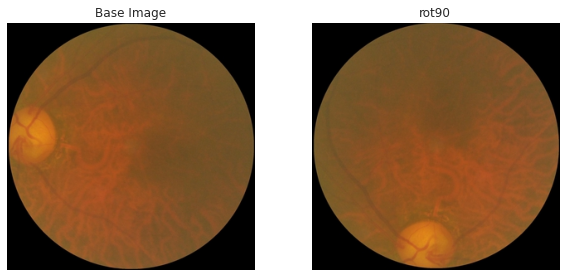

In [ ]:
  
def display_images(original_image, fx_images, title, figsize=(10, 10)):
    if isinstance(fx_images, np.ndarray) and fx_images.ndim == 4:
        for index, fx_image in enumerate(fx_images):
            plt.subplots(figsize=figsize)
            plt.subplot(2, 2, 1)
            plt.imshow(original_image)
            plt.title('Base Image')
            plt.axis("off")
            plt.subplot(2, 2, 2)
            plt.imshow(fx_image)
            plt.title(title[index])
            plt.axis("off")
            plt.show()
            plt.close()
    else:
        plt.subplots(figsize=figsize)
        plt.subplot(2, 2, 1)
        plt.imshow(original_image)
        plt.title('Base Image')
        plt.axis("off")
        plt.subplot(2, 2, 2)
        plt.imshow(fx_images)
        plt.title(title)
        plt.axis("off")
        plt.show();
class ImageAugmentationDisplaySample:

    @staticmethod
    def display_samples():

        fx = ImageFx(IMAGE_SIZE)

        image_path = os.path.join(TRAINING_IMAGE_CROPPED_PATH + '_' + str(IMAGE_SIZE), '1_left.jpg')
        cv_image = cv2.imread(image_path)
        cv_image = cv2.cvtColor(cv_image, cv2.COLOR_BGR2RGB)


        ## Zoom
        zoom_range = (0.5, 0.5)
        zoom_image = fx.zooming(cv_image, zoom_range=zoom_range)
        print('zoom_image shape',zoom_image.shape)
        print('zoom_image ndim', zoom_image.ndim)

        display_images(cv_image, zoom_image, title=f'zoom range = {zoom_range}')

        zoom_range = (0.7, 0.7)
        zoom_image = fx.zooming(cv_image, zoom_range=zoom_range)
        display_images(cv_image, zoom_image, title=f'zoom range = {zoom_range}')

        zoom_range = (0.8, 0.8)
        zoom_image = fx.zooming(cv_image, zoom_range=zoom_range)
        display_images(cv_image, zoom_image, title=f'zoom range = {zoom_range}')

        zoom_range = (0.9, 0.9)
        zoom_image = fx.zooming(cv_image, zoom_range=zoom_range)
        display_images(cv_image, zoom_image, title=f'zoom range = {zoom_range}')

        #brightness
        delta = 0.1
        bright = fx.brightness(cv_image, delta)
        display_images(cv_image, bright, title=f'bright image = delta = {delta}')

        #crop
        image_mid_size = int(IMAGE_WIDTH/2.0)
        upper_left_corner = fx.crop_to_bounding_box(cv_image, 0, 0, image_mid_size, image_mid_size)
        display_images(cv_image, upper_left_corner, title=f'upper_left_corner image = {0, 0, image_mid_size, image_mid_size}')

        bottom_left_corner = fx.crop_to_bounding_box(cv_image, image_mid_size, 0, image_mid_size, image_mid_size)
        display_images(cv_image, bottom_left_corner, title=f'bottom_left_corner image = {image_mid_size, 0, image_mid_size, image_mid_size}')

        upper_right_corner = fx.crop_to_bounding_box(cv_image, 0, image_mid_size, image_mid_size, image_mid_size)
        display_images(cv_image, upper_right_corner, title=f'upper_right_corner image = {0, image_mid_size, image_mid_size, image_mid_size}')

        bottom_right_corner = fx.crop_to_bounding_box(cv_image, image_mid_size, image_mid_size, image_mid_size, image_mid_size)
        display_images(cv_image, bottom_right_corner, title=f'bottom_right_corner image = {image_mid_size, image_mid_size, image_mid_size, image_mid_size}')

        #rot
        rot90_1 = fx.rot90(cv_image, 1)
        display_images(cv_image, rot90_1, title=f'rot 90 image k = 1')

        rot90_2 = fx.rot90(cv_image, 2)
        display_images(cv_image, rot90_2, title=f'rot 90 image k = 2')

        rot90_3 = fx.rot90(cv_image, 3)
        display_images(cv_image, rot90_3, title=f'rot 90 image k = 3')

        #flip_left_right
        flip_left_right = fx.flip_left_right(cv_image)
        display_images(cv_image, flip_left_right, title=f'flip_left_right')

        #flip_up_down
        flip_up_down = fx.flip_up_down(cv_image)
        display_images(cv_image, flip_up_down, title=f'flip_up_down')

        #central_crop
        central_crop = fx.central_crop(cv_image, 0.2)
        display_images(cv_image, central_crop, title=f'central_crop fraction 0.2')

        central_crop = fx.central_crop(cv_image, 0.5)
        display_images(cv_image, central_crop, title=f'central_crop fraction 0.5')

        central_crop = fx.central_crop(cv_image, 0.8)
        display_images(cv_image, central_crop, title=f'central_crop fraction 0.8')

        rd_crop_image = fx.random_crop_and_resize(cv_image, True, image_mid_size)
        display_images(cv_image, rd_crop_image, title=f'random crop window size #1 = {image_mid_size}')

        rd_crop_image = fx.random_crop_and_resize(cv_image, True, image_mid_size)
        display_images(cv_image, rd_crop_image, title=f'random crop window size #2 = {image_mid_size}')

        rd_crop_image = fx.random_crop_and_resize(cv_image, True, image_mid_size)
        display_images(cv_image, rd_crop_image, title=f'random crop window size #3 = {image_mid_size}')

        rd_crop_image = fx.random_crop_and_resize(cv_image, True, image_mid_size)
        display_images(cv_image, rd_crop_image, title=f'random crop window size #4 = {image_mid_size}')

    @staticmethod
    def display_random_transforms(index_image, left):

        fx = ImageFx(IMAGE_SIZE)

        image_name = f'{index_image}_left.jpg' if left else f'{index_image}_right.jpg'
        print('image name to process :', image_name)
        image_path = os.path.join(TRAINING_IMAGE_CROPPED_PATH + '_' + str(IMAGE_SIZE), image_name)
        cv_image = cv2.imread(image_path)
        cv_image = cv2.cvtColor(cv_image, cv2.COLOR_BGR2RGB)

        for index in range(15):
          image, tranform_name = fx.random_tranform(cv_image, index)
          display_images(cv_image, image, title=tranform_name)


  



#ImageAugmentationDisplaySample.display_samples()

start_index = df.index.start
stop_index = df.index.stop
index = random.randint(start_index, stop_index)

ImageAugmentationDisplaySample.display_random_transforms(index, True)
#ImageAugmentationDisplaySample.random_crop_and_resize()

#status = cv2.imwrite(os.path.join(saving_path, file_id + '_a.jpg'), bright)
#print("Image written to file-system : ", status)


### DataAugmentationGenerator class

In [ ]:
import csv
import os
import cv2
import numpy as np
import shutil
from tqdm import tqdm

class DataAugmentationGenerator:

    def __init__(self, image_size, csv_input_path, csv_output_path, image_source_folder, image_destination_folder):
        self.image_size = image_size
        self.csv_output_path = csv_output_path
        self.image_source_folder = image_source_folder
        self.image_destination_folder = image_destination_folder
        self.image_fx = ImageFx(self.image_size)
        self.disease_class_descriptions =  [{'disease_vectors': [], 'class_name': 'Normal',       'label': '0', 'samples_per_image': 0},
                                            {'disease_vectors': [], 'class_name': 'Diabetes',     'label': '1', 'samples_per_image': 0},
                                            {'disease_vectors': [], 'class_name': 'Glaucoma',     'label': '2', 'samples_per_image': 0},
                                            {'disease_vectors': [], 'class_name': 'Cataract',     'label': '3', 'samples_per_image': 0},
                                            {'disease_vectors': [], 'class_name': 'AMD',          'label': '4', 'samples_per_image': 0},
                                            {'disease_vectors': [], 'class_name': 'Hypertension', 'label': '5', 'samples_per_image': 0},
                                            {'disease_vectors': [], 'class_name': 'Myopia',       'label': '6', 'samples_per_image': 0},
                                            {'disease_vectors': [], 'class_name': 'Others',       'label': '7', 'samples_per_image': 0}]
        self.__populate_disease_vectors(csv_input_path)


    def __populate_disease_vectors(self, csv_path):

        normal_vec = []
        amd_vec = []
        cataract_vec = []
        diabetes_vec = []
        glaucoma_vec = []
        hypertension_vec = []
        myopia_vec = []
        others_vec = []
        label_vec = []
        with open(csv_path) as csvfile:
            csv_reader = csv.reader(csvfile)
            for row in csv_reader:
                column_id = row[0]
                normal = row[1]
                diabetes = row[2]
                glaucoma = row[3]
                cataract = row[4]
                amd = row[5]
                hypertension = row[6]
                myopia = row[7]
                others = row[8]
                # pas la première ligne
                if column_id != "ID":
                    #print("Processing image: " + column_id)
                    if normal == '1':
                      normal_vec.append([column_id, normal, diabetes, glaucoma, cataract, amd, hypertension, myopia, others])
                    if diabetes == '1':
                      diabetes_vec.append([column_id, normal, diabetes, glaucoma, cataract, amd, hypertension, myopia, others])
                    if glaucoma == '1':
                      glaucoma_vec.append([column_id, normal, diabetes, glaucoma, cataract, amd, hypertension, myopia, others])
                    if cataract == '1':
                      cataract_vec.append([column_id, normal, diabetes, glaucoma, cataract, amd, hypertension, myopia, others])
                    if amd == '1':
                      amd_vec.append([column_id, normal, diabetes, glaucoma, cataract, amd, hypertension, myopia, others])
                    if hypertension == '1':
                      hypertension_vec.append([column_id, normal, diabetes, glaucoma, cataract, amd, hypertension, myopia, others])
                    if myopia == '1':
                      myopia_vec.append([column_id, normal, diabetes, glaucoma, cataract, amd, hypertension, myopia, others])
                    if others == '1':
                      others_vec.append([column_id, normal, diabetes, glaucoma, cataract, amd, hypertension, myopia, others])
                    if len(row) > 9:
                      label_vec.append(str(row[9]))

        for v in self.disease_class_descriptions:
            if v['class_name'].lower() == 'normal':
              v['disease_vectors'] = normal_vec
            elif v['class_name'].lower() == 'amd':
              v['disease_vectors'] = amd_vec
            elif v['class_name'].lower() == 'diabetes':
              v['disease_vectors'] = diabetes_vec
            elif v['class_name'].lower() == 'cataract':
              v['disease_vectors'] = cataract_vec
            elif v['class_name'].lower() == 'glaucoma':
              v['disease_vectors'] = glaucoma_vec
            elif v['class_name'].lower() == 'hypertension':
              v['disease_vectors'] = hypertension_vec
            elif v['class_name'].lower() == 'myopia':
              v['disease_vectors'] = myopia_vec
            elif v['class_name'].lower() == 'others':
              v['disease_vectors'] = others_vec

        self.disease_class_descriptions.sort(key=lambda k: len(k['disease_vectors']))
        for index, _ in enumerate(self.disease_class_descriptions):
            max_len = len(self.disease_class_descriptions[-1]['disease_vectors'])
            current_len = len(self.disease_class_descriptions[index]['disease_vectors'])
            sample_per_image = np.floor((float(max_len - current_len)/float(current_len)))
            self.disease_class_descriptions[index]['samples_per_image'] = int(sample_per_image)

        #print(self.disease_class_descriptions)

    def dump_disease_class_descriptions(self):
        print('order by count size ASC')
        for v in self.disease_class_descriptions:
          DataAugmentationGenerator.print_disease_class_descriptions(v)
            

    @staticmethod
    def print_disease_class_descriptions(disease_class_description):
      v = disease_class_description
      print(f'{v["class_name"]} = {v["label"]}, fundus count : {len(v["disease_vectors"])}, sample per image : {v["samples_per_image"]}, total images : {v["samples_per_image"]*len(v["disease_vectors"]) if v["samples_per_image"] != 0 else len(v["disease_vectors"])}')

    def __save_image(self, image, image_name, suffix):
        image_to_save = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image_file = image_name + '_' + str(suffix)+'.jpg'
        image_file_path = os.path.join(self.image_destination_folder, image_file)
        exists = os.path.isfile(image_file_path)
        if exists:
            print("duplicate file found: " + image_file_path)
        status = cv2.imwrite(image_file_path, image_to_save)
        #print('save image ', image_file)
        return image_file



        #print(file_name + " written to file-system : ", status)


    def __write_header(self):
        with open(self.csv_output_path , 'w', newline='') as csvfile:
            file_writer = csv.writer(csvfile, delimiter=',', quotechar='|', quoting=csv.QUOTE_MINIMAL)
            file_writer.writerow(['ID', 'Normal', 'Diabetes', 'Glaucoma', 'Cataract', 'AMD', 'Hypertension',
                                  'Myopia', 'Others', 'Label'])
            return file_writer


    def __generate_images(self, image_file_name, samples_number, disease_vector, label, suffix):
        image_base_name = image_file_name[0:-4]
        #print('image_base_name', image_base_name)
        fundus_image = os.path.join(self.image_source_folder, image_file_name)
        image = cv2.imread(fundus_image)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        original_image = image
        total_image = 0
        with open(self.csv_output_path, 'a', newline='') as csvfile:
            file_writer = csv.writer(csvfile, delimiter=',', quotechar='|', quoting=csv.QUOTE_MINIMAL)
            for index in range(samples_number):
                augmented, _ = self.image_fx.random_tranform(image, index)
                if augmented is not None:
                    suffix_file = suffix +  '_' + str(index)
                    image_file_name = self.__save_image(augmented, image_base_name, suffix_file)
                    if image_file_name is not None:
                        file_writer.writerow([image_file_name, disease_vector[0], disease_vector[1], disease_vector[2], disease_vector[3],
                                   disease_vector[4], disease_vector[5], disease_vector[6], disease_vector[7], str(label)])
                        total_image = total_image + 1
        return total_image


    def __random_generate_images(self, disease_class_description, index_description):

        images_to_process = disease_class_description['disease_vectors']
        samples_per_image = disease_class_description['samples_per_image']
        class_name = disease_class_description['class_name']
        label = disease_class_description['label']
        total_augmented_images = 0
        #DataAugmentationGenerator.print_disease_class_descriptions(disease_class_description)
        
        for image_index in tqdm(range(len(images_to_process))):
          disease_vector = images_to_process[image_index]
          image_file_name = disease_vector[0]
          suffix = str(label) + '_' + str(index_description) + '_' + str(image_index)
          total_images = self.__generate_images(image_file_name, samples_per_image, disease_vector[1:], label, suffix)
          total_augmented_images = total_augmented_images + total_images
 
        return total_augmented_images

    def clear_previous(self):
      # Delete previous file and directory
        if os.path.isfile(self.csv_output_path):
            os.remove(self.csv_output_path)
        if os.path.exists(self.image_destination_folder):
            shutil.rmtree(self.image_destination_folder, ignore_errors=True)

    def generate_augmentations(self):
      self.clear_previous()
      if not os.path.exists(self.image_destination_folder):
          os.mkdir(self.image_destination_folder)
      self.__write_header()
      image_count = 0
      for index_description, _ in enumerate(self.disease_class_descriptions):
        print(f"step {index_description+1}/{len(self.disease_class_descriptions)}")
        disease_class_description = self.disease_class_descriptions[index_description]
        #print(disease_class_description)
        count =  self.__random_generate_images(disease_class_description, index_description)
        image_count = image_count + count
        #break
      return image_count

    @staticmethod
    def run():
      csv_path = os.path.join(CSV_OUTPUT_PATH, 'odir.csv')
      csv_augmente = os.path.join(CSV_OUTPUT_PATH, 'odir_augmentation.csv')
      source_folder = TRAINING_IMAGE_CROPPED_PATH + '_' + str(IMAGE_WIDTH)
      destination_folder = TRAINING_IMAGE_AUGMENTED_PATH + '_' + str(IMAGE_WIDTH)
      data_aug_den = DataAugmentationGenerator(IMAGE_WIDTH, csv_path, csv_augmente, source_folder, destination_folder)
      count = data_aug_den.generate_augmentations()
      print('Augmented image count :', count)

    @staticmethod
    def run_for_unique_class(run_augmentation=False):
      csv_path = os.path.join(CSV_OUTPUT_PATH, 'odir_classes.csv')
      csv_augmente = os.path.join(CSV_OUTPUT_PATH, 'odir_unique_class_augmentation.csv')
      source_folder = TRAINING_IMAGE_CROPPED_PATH + '_' + str(IMAGE_WIDTH)
      destination_folder = TRAINING_IMAGE_UNIQUE_CLASS_AUGMENTED_PATH + '_' + str(IMAGE_WIDTH)
      data_aug_den = DataAugmentationGenerator(IMAGE_WIDTH, csv_path, csv_augmente, source_folder, destination_folder)
      data_aug_den.dump_disease_class_descriptions()
      if run_augmentation:
        count = data_aug_den.generate_augmentations()
        print('Augmented image count :', count)
      return data_aug_den

    @staticmethod
    def create_for_unique_class():
      csv_path = os.path.join(CSV_OUTPUT_PATH, 'odir_classes.csv')
      csv_augmente = os.path.join(CSV_OUTPUT_PATH, 'odir_unique_class_augmentation.csv')
      source_folder = TRAINING_IMAGE_CROPPED_PATH + '_' + str(IMAGE_WIDTH)
      destination_folder = TRAINING_IMAGE_UNIQUE_CLASS_AUGMENTED_PATH + '_' + str(IMAGE_WIDTH)
      data_aug_den = DataAugmentationGenerator(IMAGE_WIDTH, csv_path, csv_augmente, source_folder, destination_folder)
      return data_aug_den
# Uncomment to create image augmentations
data_aug_den = DataAugmentationGenerator.run_for_unique_class(True)
#.clear_previous()
#data_aug_den = DataAugmentationGenerator.create_for_unique_class()
#data_aug_den.dump_disease_class_descriptions()
 

order by count size ASC
Hypertension = 5, fundus count : 104, sample per image : 26, total images : 2704
Glaucoma = 2, fundus count : 218, sample per image : 11, total images : 2398
AMD = 4, fundus count : 237, sample per image : 10, total images : 2370
Myopia = 6, fundus count : 237, sample per image : 10, total images : 2370
Cataract = 3, fundus count : 250, sample per image : 10, total images : 2500
Others = 7, fundus count : 815, sample per image : 2, total images : 1630
Diabetes = 1, fundus count : 1389, sample per image : 1, total images : 1389
Normal = 0, fundus count : 2816, sample per image : 0, total images : 2816
step 1/8


100%|██████████| 104/104 [00:36<00:00,  2.82it/s]


step 2/8


100%|██████████| 218/218 [00:33<00:00,  6.47it/s]


step 3/8


100%|██████████| 237/237 [00:35<00:00,  6.66it/s]


step 4/8


100%|██████████| 237/237 [00:35<00:00,  6.65it/s]


step 5/8


100%|██████████| 250/250 [00:36<00:00,  6.77it/s]


step 6/8


100%|██████████| 815/815 [00:20<00:00, 38.94it/s]


step 7/8


100%|██████████| 1389/1389 [00:22<00:00, 61.04it/s]


step 8/8


100%|██████████| 2816/2816 [00:11<00:00, 243.48it/s]

Augmented image count : 15361


# Modélisation et entrainement

## OdirDataframe

---


Merge CSV reconstruit + CSV issu de la régularisation par image augmentation
construit Dataset Training + Validation

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split

class OdirDataframe:

  def __init__(self, 
           csv_folder,
           train_image_folder, 
           train_augmented_image_folder, 
           odir_csv,
           odir_augmented_csv,
           class_mode):
    self.class_mode = class_mode
    self.all_df = self._load_dataframe(csv_folder, 
                                               train_image_folder, 
                                               train_augmented_image_folder, 
                                               odir_csv, 
                                               odir_augmented_csv)
    if self.class_mode == 'multiclass':
      self.all_df['Label'] = self.all_df['Label'].astype('str')
   

  
  def _load_dataframe(self, csv_folder, 
                     train_image_folder, 
                     train_augmented_image_folder, 
                     odir_csv, 
                     odir_augmented_csv):
    odir_csv_path = None
    if odir_csv is not None:
      odir_csv_path = os.path.join(csv_folder, odir_csv)

    odir_augmented_csv_path = None
    if odir_augmented_csv is not None:
      odir_augmented_csv_path = os.path.join(csv_folder, odir_augmented_csv)

    odir_dataset = None
    if odir_csv_path is not None:
      odir_dataset = pd.read_csv(odir_csv_path)

    odir_augmented_dataset = None
    if odir_augmented_csv_path is not None:
      odir_augmented_dataset = pd.read_csv(odir_augmented_csv_path)
      if self.class_mode == 'multilabel' and 'Label' in odir_augmented_dataset.columns:
        odir_augmented_dataset.drop('Label', axis=1, inplace=True)
    
    if train_image_folder is not None and odir_dataset is not None:
      odir_dataset['ID'] = odir_dataset['ID'].apply(lambda image_name: os.path.join(train_image_folder, image_name))

    if train_augmented_image_folder is not None and odir_augmented_dataset is not None:
      odir_augmented_dataset['ID'] = odir_augmented_dataset['ID'].apply(lambda image_name: os.path.join(train_augmented_image_folder, image_name))

    odir_concat_df = None
    if odir_dataset is not None and odir_augmented_dataset is not None:
      odir_concat_df = pd.concat([odir_dataset, odir_augmented_dataset])
    elif odir_dataset is not None:
      odir_concat_df = odir_dataset
    elif odir_augmented_dataset is not None:
      odir_concat_df = odir_augmented_dataset

    if odir_concat_df is None:
      print('Attention no dataset to process')
    
    return odir_concat_df
    
    
    

  @staticmethod
  def add_label_col(df):
    df['label'] = df.apply(lambda x: OdirDataframe.compute_label(x.Normal,
                                                                 x.Diabetes, 
                                                                 x.Glaucoma,
                                                                 x.Cataract,
                                                                 x.AMD, 
                                                                 x.Hypertension,
                                                                 x.Myopia,
                                                                 x.Others), axis=1)

#'N' : '10000000',
#         'D' : '01000000',
#         'G' : '00100000',
#         'C' : '00010000',
#         'A' : '00001000',
#         'H' : '00000100',
#         'M' : '00000010',
#         '0' : '00000001
  @staticmethod
  def compute_label(N, D, G, C, A, H, M, O):
    label = ''
    if N != 0:
      label += 'N'
    if D != 0:
      label += 'D'
    if G != 0:
      label += 'G'
    if C != 0:
      label += 'C'
    if A != 0:
      label += 'A'
    if H != 0:
      label += 'H'
    if M != 0:
      label += 'M'
    if O != 0:
      label += 'O'
    return label

  def sample(self, sample=100):
    df_disease_sample = None
    if self.class_mode == 'multiclass':
      print('create sample int multiclass mode')
      df_sample = None
      for cl in range(len(DISEASE_CLASSES)):
        label = str(cl)
        df_c = self.all_df[self.all_df['Label'] == label].sample(sample)
        if df_sample is None:
          df_sample = df_c
        else:
          df_sample = pd.concat([df_sample, df_c])
      df_disease_sample = df_sample
    else:
      #print('create sample in multi label')
      df_sample = None
      for col in DISEASE_CLASSES:
        df_c = self.all_df[self.all_df[col] == 1].sample(sample)
        if df_sample is None:
          df_sample = df_c
        else:
          df_sample = pd.concat([df_sample, df_c])
      df_disease_sample = df_sample
    #print('end sample')
    return df_disease_sample
  
  def train_valid_test_split(self, sample=None, valid_size=0.20, test_size=0.20, random_state=42):
    df_c = None
    if sample is not None:
      df_c = self.sample(sample)
    else:
      df_c = self.all_df
    
    
    train, test = train_test_split(df_c, test_size=test_size, random_state=random_state, shuffle=True, stratify=df_c['Label'] if self.class_mode == 'multiclass' else None)
    train, valid = train_test_split(train, test_size=valid_size, random_state=random_state, shuffle=True, stratify=train['Label'] if self.class_mode == 'multiclass' else None )

    return train, valid, test

  @staticmethod
  def create_multiclass_dataframe(csv_folder=CSV_OUTPUT_PATH, 
                       train_image_folder=TRAINING_IMAGE_CROPPED_PATH + '_' + str(IMAGE_WIDTH),
                       train_augmented_image_folder = TRAINING_IMAGE_UNIQUE_CLASS_AUGMENTED_PATH + '_' + str(IMAGE_WIDTH),
                       odir_csv='odir_classes.csv', odir_augmented_csv='odir_unique_class_augmentation.csv'):
    odir_df = OdirDataframe(csv_folder, train_image_folder, train_augmented_image_folder, odir_csv, odir_augmented_csv, class_mode='multiclass')
    return odir_df
  
  @staticmethod
  def create_multilabel_dataframe(csv_folder=CSV_OUTPUT_PATH, 
                       train_image_folder=TRAINING_IMAGE_CROPPED_PATH + '_' + str(IMAGE_WIDTH),
                       train_augmented_image_folder = TRAINING_IMAGE_UNIQUE_CLASS_AUGMENTED_PATH + '_' + str(IMAGE_WIDTH),
                       odir_csv='odir.csv', odir_augmented_csv='odir_unique_class_augmentation.csv'):
    odir_df = OdirDataframe(csv_folder, train_image_folder, train_augmented_image_folder, odir_csv, odir_augmented_csv, class_mode='multilabel')
    return odir_df
 

  


## OdirDataGenerator class

---



In [6]:
import tensorflow as tf
from tensorflow import keras
import warnings
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator


class OdirDataGenerator:

  """
  Train, validation  generator
  """
  #DISEASE_CLASSES = ['Normal', 'Diabetes', 'Glaucoma', 'Cataract', 'AMD', 'Hypertension', 'Myopia', 'Others']
  def __init__(self, train_df, valid_df, test_df, class_mode, data_augmentation=False, image_size=(IMAGE_WIDTH, IMAGE_WIDTH), batch_size=32):
    self.image_size = image_size
    self.batch_size = batch_size
    self.train_df = train_df
    self.valid_df = valid_df
    self.test_df = test_df
    #print(f'class_mode = {class_mode}')
    self.class_mode = class_mode
    gen_class_mode = ''
    if class_mode == 'multiclass':
      gen_class_mode = 'sparse'
    elif class_mode == 'multilabel':
      gen_class_mode = 'raw'
    else:
      raise ValueError(f'Invalid class_mode {class_mode}: must be multiclass or multilabel') 
    
    #print(f'class_mode = {self.class_mode}')

    train_datagen = None
    valid_datagen = None
    subset_training=None
    subset_validation=None
    classes = DISEASE_CLASSES

    validation_split = 0.0
    if valid_df is None:
      validation_split = 0.20
      subset_training="training"
      subset_validation="validation"
      
    if data_augmentation:
       train_datagen = ImageDataGenerator(
                            rotation_range=40, 
                            width_shift_range=0.2, 
                            height_shift_range=0.2,
                            #shear_range=0.2,
                            fill_mode='constant',
                            #brightness_range=(0.2, 0.8),
                            zoom_range=0.2,
                            horizontal_flip=True,
                            vertical_flip=True,
                            validation_split=validation_split,
                            preprocessing_function=OdirDataGenerator._preprocess_input_fn)
    else: 
      train_datagen = ImageDataGenerator(validation_split=validation_split,
                                         preprocessing_function=OdirDataGenerator._preprocess_input_fn)

    if valid_df is not None:
      #print('valid_datagen created')
      if data_augmentation:
        valid_datagen = ImageDataGenerator(
                            rotation_range=40, 
                            width_shift_range=0.3, 
                            height_shift_range=0.2,
                            #shear_range=0.2,
                            fill_mode='constant',
                            #brightness_range=(0.2, 0.8),
                            zoom_range=0.2,
                            horizontal_flip=True,
                            vertical_flip=True,
                            validation_split=validation_split,
                            preprocessing_function=OdirDataGenerator._preprocess_input_fn)
      else: 
        valid_datagen = ImageDataGenerator(preprocessing_function=OdirDataGenerator._preprocess_input_fn)
    else:
      valid_datagen = train_datagen
  
    test_datagen = ImageDataGenerator(preprocessing_function=OdirDataGenerator._preprocess_input_fn)
    y_col = None
    if gen_class_mode == 'raw':
      y_col = DISEASE_CLASSES
    elif gen_class_mode == 'sparse':
      y_col = 'Label'

    # Train generator
    self.train_generator = train_datagen.flow_from_dataframe(dataframe=train_df,
                                                              directory=None,
                                                              x_col="ID",
                                                              y_col=y_col,
                                                              subset=subset_training,
                                                              batch_size=batch_size,
                                                              seed=42,
                                                              shuffle=True,
                                                              class_mode=gen_class_mode,
                                                              target_size=image_size)
    print('Training data generated')
    # Valid generator
    validation_df = train_df
    if valid_df is not None:
      validation_df = valid_df
    self.valid_generator = valid_datagen.flow_from_dataframe(dataframe=validation_df,
                                                              directory=None,
                                                              x_col="ID",
                                                              y_col=y_col,
                                                              subset=subset_validation,
                                                              batch_size=batch_size,
                                                              seed=42,
                                                              shuffle=True,
                                                              class_mode=gen_class_mode,
                                                              target_size=image_size)
    print('Validation data generated')
    # test generator
    self.test_generator = test_datagen.flow_from_dataframe(dataframe=test_df,
                                                           directory=None,
                                                           x_col="ID",
                                                           y_col=y_col,
                                                           #subset="validation",
                                                           batch_size=batch_size,
                                                           seed=42,
                                                           shuffle=False,
                                                           class_mode=gen_class_mode,
                                                           target_size=image_size)
    print('Test data generated')

  @classmethod
  def from_odir_dataframe(cls, odir_dataframe, sample=None, data_augmentation=False, image_size=(IMAGE_WIDTH, IMAGE_WIDTH), batch_size=32):
    # print('sample = ', sample)
    # print('odir_dataframe', odir_dataframe)
    train_df, valid_df, test_df = odir_dataframe.train_valid_test_split(sample=sample)
    # print('call after ', train_df, valid_df, test_df)
    return cls(train_df=train_df, valid_df=valid_df, test_df=test_df, class_mode=odir_dataframe.class_mode, data_augmentation=data_augmentation, image_size=image_size, batch_size=batch_size)
    # return None

  @staticmethod  
  def _preprocess_input_fn(img):
    img = tf.keras.applications.xception.preprocess_input(img)
    # img = img.astype(np.float32) / 255.0
    # img = (img - 0.5) * 2
    # img /= 127.5
    # img -= 1.
    #print(img)
    #print('max', img.max())
    #print('min', img.min())
    return img

  @staticmethod 
  def preprocess_input(img):
    return OdirDataGenerator._preprocess_input_fn(img)

  @staticmethod
  def _add_class_name(label, flag, class_name):
    if flag == 0:
      return label
    if label is not None:
      label = label+'/' + class_name
    else:
      label = class_name
    return label

  @staticmethod
  def _compute_label(label_vec, class_names):
    label = ''
    for i in range(len(label_vec)):
      if label_vec[i] == 1:
        if label == '':
          label = class_names[i]
        else:
          label = label + '/' + class_names[i]
    return label
      

    label = ''
    if label_vec[0] == 1:
      label += class_names[0]
    if D != 0:
      label += 'D'
    if G != 0:
      label += 'G'
    if C != 0:
      label += 'C'
    if A != 0:
      label += 'A'
    if H != 0:
      label += 'H'
    if M != 0:
      label += 'M'
    if O != 0:
      label += 'O'
    return label
  
  def _get_label_name(self, label, class_names):
    return OdirDataGenerator.get_class_name(label, self.class_mode, class_names)

  @staticmethod
  def get_class_name(label, class_mode='multiclass', class_names=DISEASE_CLASSES):
    label_str = None
    #print(self.class_mode)
    if class_mode == 'multiclass':
      #print('label = ', int(label))
      label_str = class_names[int(label)]
    else:
      label_str = OdirDataGenerator._compute_label(label, class_names)
    return label_str

  @staticmethod
  def prepare_image_for_viz(img):
    img = np.copy(img)
    img += 1
    img *= 127.5
    return img
  def visualize(self, data_test=False):
    '''
    Visualize a sample of generated data
    '''
    plt.figure(figsize=(10, 10))
    for _ in range(len(self.train_generator.filenames)):
      images, labels = self.train_generator.next()
      for i in range(9):
        ax = plt.subplot(3, 3, i + 1)

        img = OdirDataGenerator.prepare_image_for_viz(images[i])
        plt.imshow(img.astype('uint8'))
        label_name = self._get_label_name(labels[i], DISEASE_CLASSES)
        #label_name = self.train_generator.class_indices[labels[i]]
        plt.title(label_name)
        plt.axis("off")
        
      plt.show()
      plt.close()
      break

  @staticmethod
  def visualize_image(img, label, prepare_for_viz=True):
    '''
    Visualize an image
    '''
    plt.figure(figsize=(10, 10))
    if prepare_for_viz:
      img = img = OdirDataGenerator.prepare_image_for_viz(img)
      
        # img += 1
        # img *= 127.5
    plt.imshow(img.astype('uint8'))
    label_name = DISEASE_CLASSES[int(label)]
    plt.title(label_name)
    plt.axis("off")
        
    plt.show()
    plt.close()
    
  @staticmethod
  def filter_valid_filepaths(df, directory, x_col, white_list_formats = ("png", "jpg", "jpeg", "bmp", "ppm", "tif", "tiff")):
          """Keep only dataframe rows with valid filenames.
          Args:
              df: Pandas dataframe containing filenames in a column
              x_col: string, column in `df` that contains the filenames or
                  filepaths
          Returns:
              absolute paths to image files
          """
          filepaths = df[x_col].map(
              lambda fname: os.path.join(directory, fname)
          )
          mask = filepaths.apply(
              validate_filename, args=(white_list_formats,)
          )
          #print(f'mask = {mask}')
          n_invalid = (~mask).sum()
          if n_invalid:
              warnings.warn(
                  'Found {} invalid image filename(s) in x_col="{}". '
                  "These filename(s) will be ignored.".format(n_invalid, x_col)
              )
          return df[mask]

  @staticmethod
  def validate_filename(filename, white_list_formats):
      """Check if a filename refers to a valid file.
      Args:
          filename: String, absolute path to a file
          white_list_formats: Set, allowed file extensions
      Returns:
          A boolean value indicating if the filename is valid or not
      """
      rc = filename.lower().endswith(white_list_formats) and os.path.isfile(
          filename
      )
      if not rc:
        print(f'Invalid filename = {filename}')
      return rc

  #df_filter = filter_valid_filepaths(df_sample, directory='', x_col='ID')

  
  
  
  




## OdirModel based on Xception Transfer Learning Model

In [7]:
import tensorflow as tf
from tensorflow import keras

# from keras import layers
# from keras import optimizers
# from keras import callbacks
#

import os
import time
import datetime

from keras import backend as K 
import numpy as np
import time
import pickle # Saving history

class OdirModel:
  """
    Create and fit the model
  """
    
  def __init__(self, data_generator, class_mode, name=''):
    self.data_generator = data_generator
    self.num_classes = 8
    self.name = name
    self.class_mode = class_mode
    if self.class_mode != 'multiclass' and self.class_mode != 'multilabel':
      raise Exception(f'Invalid input class_mode {class_mode}. Must be multiclass or mutilabel')
    self.input_shape = (self.data_generator.image_size[0], self.data_generator.image_size[1], 3)
    self.base_model, self.base_model_name = self._create_base_model(self.input_shape)
    self.model_last_path = ''

  def _create_base_model(self, input_shape):
    model = keras.applications.xception.Xception(weights='imagenet',
                                   include_top=False,
                                   input_shape=self.input_shape)
    model.trainable = False
    return model, 'Xception'
     

  # def _add_top(self, base):
  #   x = base.output
  #   return x

  def create_model(self):
 
    # base = self.base_model

    # x = base.output

    # # Global averaging pool layer
    # x = keras.layers.GlobalAveragePooling2D()(x)

    # # Regular densely connected layer
    # x = keras.layers.Dense(512, activation='relu')(x)

    # # Output layer
    # predictions = keras.layers.Dense(8, activation='softmax')(x)

    # return keras.Model(inputs=base.input, outputs=predictions)

    # # Create new model on top
    # inputs = keras.layers.Input(shape=self.input_shape)


    base = self.base_model

    x = base.output

    # Classifier layers
    x = keras.layers.Flatten()(x)
    # Regularize with dropout
    x = keras.layers.Dropout(0.4)(x)  
    # x = keras.layers.Dense(2048, activation='relu')
    # x = keras.layers.Dropout(rate=0.5)(x)
    x = keras.layers.Dense(1028, activation='relu')(x)
    x = keras.layers.Dropout(rate=0.4)(x)
    x = keras.layers.Dense(512, activation='relu')(x)
    x = keras.layers.Dropout(rate=0.4)(x)
    activation = 'softmax' if self.class_mode == 'multiclass' else 'sigmoid'
    predictions = keras.layers.Dense(self.num_classes, activation=activation)(x)
    model = keras.Model(inputs=base.input, outputs=predictions)

    return model

  def create_model_legacy(self):
    # base_model = base
    # base_model_name = 'None'
    # if base is None:
    #   base_model = self.default_base_model
    #   base_model_name = 'Xception'

    # # Update base model
    # self._update_base_model(base_model, base_model_name)


    # Create new model on top
    inputs = keras.layers.Input(shape=self.input_shape)

    # Image augmentation block
    #x = data_augmentation(inputs) # Apply random data augmentation

    # Pre-trained Xception weights requires that input be scaled
    # from (0, 255) to a range of (-1., +1.), the rescaling layer
    # outputs: `(inputs * scale) + offset`
    # if self.base_model_name == 'Xception':
    #   print('base_model is xception scale [-1, 1]')
    #   scale_layer = keras.layers.Rescaling(scale=1 / 127.5, offset=-1)
    # else:
    #   print('base_model is not xception scale [0, 1]')
    #   scale_layer = keras.layers.Rescaling(scale=1.0 / 255.)

    #x = scale_layer(inputs)

    # The base model contains batchnorm layers. We want to keep them in inference mode
    # when we unfreeze the base model for fine-tuning, so we make sure that the
    # base_model is running in inference mode here.
    #x = self.base_model(x, training=False)
    
    # x = keras.layers.MaxPooling2D((2,2))(x)
    # x = keras.layers.Flatten()(x)
    # x = keras.layers.Dropout(0.5)(x)  # Regularize with dropout
    # x = keras.layers.Dense(1024, activation='relu')(x)
    # x = keras.layers.Dense(256, activation='relu')(x)
    #outputs = keras.layers.Dense(1)(x)
    # Classifier
    x = keras.layers.Flatten()(x)
    x = keras.layers.Dropout(0.4)(x)  # Regularize with dropout
    # x = keras.layers.Dense(2048, activation='relu')
    # x = keras.layers.Dropout(rate=0.5)(x)
    x = keras.layers.Dense(1028, activation='relu')(x)
    x = keras.layers.Dropout(rate=0.4)(x)
    x = keras.layers.Dense(512, activation='relu')(x)
    x = keras.layers.Dropout(rate=0.4)(x)
    activation = 'softmax' if self.class_mode == 'multiclass' else 'sigmoid'
    outputs = keras.layers.Dense(self.num_classes, activation=activation)(x)
    model = keras.Model(inputs, outputs)

    return model

  @staticmethod
  def summary(model):
    model.summary()

  
  # def setup_model(self, model, trainable):
   

  #   model.compile(
  #       loss='categorical_crossentropy',
  #       # Slower training rate for fine-tuning
  #       optimizer=optimizers.SGD(lr=1e-4, momentum=0.9),
  #       metrics=['accuracy']
  #   )


  @staticmethod
  def plot_model(to_file, model):
    tf.keras.utils.plot_model(model, to_file, show_shapes=True, show_layer_names=True)

  # Setup model for fine tuning or not
  def setup_model(self, model, opt='adam', layer_trainable_index=-1):
    if layer_trainable_index >= 0:
      print('Training with fine tunning')
      # Freeze the un-trainable layers of the model base
      for layer in model.layers[:layer_trainable_index]:
        layer.trainable = False

      for layer in model.layers[layer_trainable_index:]:
        layer.trainable = True

    # for layer in model.layers[:115]:
    # layer.trainable = False
    # for layer in model.layers[115:]:
    # layer.trainable = True

    loss = 'sparse_categorical_crossentropy'
    if self.class_mode == 'multilabel':
      loss = 'binary_crossentropy'
    
    optimizer = opt
    if layer_trainable_index >= 0:
      # Low learning rate
      optimizer = keras.optimizers.Adam(1e-5) if opt == 'adam' else keras.optimizers.RMSprop(1e-5)
  
    model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

    

  @staticmethod
  def load_model(model_h5_name):
    h5_path = os.path.join(MODEL_OUTPUT_PATH, model_h5_name)
    model = tf.keras.models.load_model(h5_path)
    # model.compile(
    #         optimizer=keras.optimizers.Adam(1e-6),  # Low learning rate
    #         loss=keras.losses.BinaryCrossentropy(from_logits=True),
    #         metrics=['accuracy']
    #     )
    return model

  def train(self, model, epochs=50):
    """
      Train the model
    """
    # Savegarde automatique des poids
    # Sauvegarder les meilleurs poids du modèle au cours de l'entraînement

    checkpointer = keras.callbacks.ModelCheckpoint(filepath= os.path.join(MODEL_OUTPUT_PATH, 'odir_model_checkpoint_at_{epoch}.h5'),
                                          monitor='val_loss',
                                       save_best_only=True,
                                       save_weights_only=False,
                                       mode='min',
                                       verbose=1,
                                           save_freq='epoch')
   
    early_stopping = keras.callbacks.EarlyStopping(monitor = 'val_loss',
                        patience = 10,
                        restore_best_weights = True)


    # # Early stop
    # # Arrêter l'entraînement si le modèle n'évolue plus (très pratique pour ne pas gérer le nombre d'epoch) :
    # earlystop = callbacks.EarlyStopping( monitor='val_accuracy', 
    # patience=8, 
    # min_delta=0.001, 
    # mode='max')

    # Réduction automatique du taux d'apprentissage (learning rate)
    reduce_lr = keras.callbacks.ReduceLROnPlateau(verbose=1)
    callbacks = [early_stopping]
    


    train_generator = self.data_generator.train_generator
    valid_generator = self.data_generator.valid_generator
    step_size_train = train_generator.n//train_generator.batch_size
    step_size_valid = valid_generator.n//valid_generator.batch_size
  
    training_history = model.fit(train_generator,
                      steps_per_epoch=step_size_train,
                      validation_data=valid_generator,
                      validation_steps=step_size_valid,
                      epochs=epochs,
                      callbacks=callbacks)
    
    # Get the best saved weights
    #model.load_weights('best_model1.h5')
    self.model_last_path =  f'odir_model_weights_{self.base_model_name}_{datetime.date.today()}_{self.name}.h5'
    model_save_path = os.path.join(MODEL_OUTPUT_PATH, self.model_last_path)
    print('saving model at:', model_save_path)
    model.save(model_save_path)

    return training_history

  @staticmethod
  def instanciate_and_setup_model(data_generator, class_mode, name, layer_trainable_index=-1, summary_model=True, print_model=True, clear_session=True):
    # Clear the old session.
    if clear_session:
      K.clear_session()
    odir_model = OdirModel(data_generator, class_mode, name)
    model = odir_model.create_model()
    # setup
    odir_model.setup_model(model, layer_trainable_index=layer_trainable_index)
    #print summary & plot
    if summary_model:
      odir_model.summary(model)
    if print_model:
      #odir_model.plot_model(model)
      keras.utils.plot_model(model, to_file=os.path.join(MODEL_OUTPUT_PATH, 'odir_model.png'), show_shapes=True, show_layer_names=True)
    return odir_model, model

   
        

## OdirModelEvaluator

---



In [8]:
class OdirModelEvaluator:
     
    def __init__(self, model, training, test_generator=None):
        self.training = training
        self.test_generator = test_generator
        # predict the data
        # steps=5
        # self.y_pred_raw = model.predict_generator(self.test_generator, steps=steps)
        # self.y_pred = np.argmax(self.y_pred_raw, axis=1)
        # self.y_true=y_true[:len(self.y_pred)]        
#            def plot_accuracy(history):
#         # Hide meanwhile for now
#         plt.plot(history.history['accuracy'], label='accuracy')
#         plt.plot(history.history['val_accuracy'], label='val_accuracy')
#         plt.xlabel('Epoch')
#         plt.ylabel('Accuracy')
#         plt.legend(loc='lower right')
#         #plt.savefig(new_folder)
#         plt.show()
# plot_accuracy(history)
# plot_accuracy(history2)
    
    """
    Accuracy, evaluation
    """
    def plot_history(self):
        """
        Plot training history
        """
        ## Trained model analysis and evaluation
        f, ax = plt.subplots(1,2, figsize=(12,3))
        ax[0].plot(self.training.history['loss'], label="Loss")
        ax[0].plot(self.training.history['val_loss'], label="Validation loss")
        ax[0].set_title('Model loss by epoch')
        ax[0].set_xlabel('Epoch')
        ax[0].set_ylabel('Loss')
        ax[0].legend()

        # Accuracy
        ax[1].plot(self.training.history['accuracy'], label="Accuracy")
        ax[1].plot(self.training.history['val_accuracy'], label="Validation accuracy")
        ax[1].set_title('Model accuracy by epoch')
        ax[1].set_xlabel('Epoch')
        ax[1].set_ylabel('Accuracy')
        ax[1].legend()
        plt.tight_layout()
        plt.show()
    
    # def plot_roc(self):
    #     #y_pred_keras = model.predict_generator(test_gen, steps=len(df_val), verbose=1)
    #     # Calculate roc
    #     fpr_keras, tpr_keras, thresholds_keras = roc_curve(self.y_true, self.y_pred)
    #     auc_keras = auc(fpr_keras, tpr_keras)
        
    #     plt.figure(1)
    #     plt.plot([0, 1], [0, 1], 'k--')
    #     plt.plot(fpr_keras, tpr_keras, label='area = {:.3f}'.format(auc_keras))
    #     plt.xlabel('False positive rate')
    #     plt.ylabel('True positive rate')
    #     plt.title('ROC curve')
    #     plt.legend(loc='best')
    #     plt.show()
        
    # def print_report(self):
    #     """
    #     Predict and evaluate using ground truth from labels
    #     Test generator did not shuffle 
    #     and we can use true labels for comparison
    #     """
    #     #Print classification report
    #     print(metrics.classification_report(self.y_true, self.y_pred))

# Create evaluator instance
# evaluator = OdirModelEvaluator(model, training, generators.test_generator, test_df.label.values)

# # Draw accuracy and loss charts
# evaluator.plot_history()

# # ROC curve
# evaluator.plot_roc()

# # Classification report
# evaluator.print_report()

# Execution

## I- Multiclass classification

### Exemple d'entrainement du modèle


In [ ]:
odir_df_ex = OdirDataframe.create_multiclass_dataframe()
#odir_df_ex.all_df.head()

#df_sample = odir_df_ex.all_df 
df_sample = odir_df_ex.sample()

df_sample['Label'].value_counts() 
df_sample.head()


create sample int multiclass mode


ID  Normal  Diabetes  \
2784  /content/drive/MyDrive/Colab Notebooks/ODIR-5K...       1         0   
3092  /content/drive/MyDrive/Colab Notebooks/ODIR-5K...       1         0   
4048  /content/drive/MyDrive/Colab Notebooks/ODIR-5K...       1         0   
3768  /content/drive/MyDrive/Colab Notebooks/ODIR-5K...       1         0   
4589  /content/drive/MyDrive/Colab Notebooks/ODIR-5K...       1         0   

      Glaucoma  Cataract  AMD  Hypertension  Myopia  Others Label  
2784         0         0    0             0       0       0     0  
3092         0         0    0             0       0       0     0  
4048         0         0    0             0       0       0     0  
3768         0         0    0             0       0       0     0  
4589         0         0    0             0       0       0     0

create sample int multiclass mode
Found 512 validated image filenames belonging to 8 classes.
Training data generated
Found 128 validated image filenames belonging to 8 classes.
Validation data generated
Found 160 validated image filenames belonging to 8 classes.
Test data generated
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 149, 149, 32  864         ['input_1[0][0]']                
                                )                                                                 
        

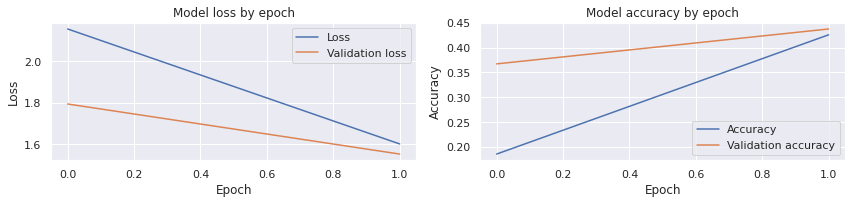

In [ ]:
from keras.models import load_model
from keras import backend as K 
K.clear_session()

#1. Création des dataframe train et valid
odir_df_ex = OdirDataframe.create_multiclass_dataframe()
data_generator_ex = OdirDataGenerator.from_odir_dataframe(odir_df_ex, sample=100)

#2. Instantiation du modèle
odir_model_ex = OdirModel(data_generator_ex, class_mode='multiclass', name='multiclass')
model_ex = odir_model_ex.create_model()
odir_model_ex.summary(model_ex)
odir_model_ex.plot_model(model_ex)
tf.keras.utils.plot_model(model_ex, show_shapes=True, show_layer_names=True)

#3. Entrainement et évaluation du modèle
odir_model_ex.setup_model(model_ex, layer_trainable_index=126)
training_ex = odir_model_ex.train(model_ex, epochs=2)
odir_evaluator_ex = OdirModelEvaluator(model_ex, training_ex)
odir_evaluator_ex.plot_history()


# model_h5_path = os.path.join(MODEL_OUTPUT_PATH, 'odir_xception_weights_True.h5')
# model = load_model('odir_xception_weights_True.h5')
#model.trainable = True
# model.summary()

# new_model.compile(
#     optimizer=keras.optimizers.Adam(1e-6),  # Low learning rate
#     loss=keras.losses.BinaryCrossentropy(from_logits=True),
#     metrics=['accuracy']
# )

# epochs = 10

# STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
# STEP_SIZE_VALID=valid_generator.n//valid_generator.batch_size
# history2 = new_model.fit(train_generator,
#                      steps_per_epoch=STEP_SIZE_TRAIN,
#                      validation_data=valid_generator,
#                      validation_steps=STEP_SIZE_VALID,
#                      epochs=epochs)

# print("saving model_weights_trainable")
# model.save(os.path.join(MODEL_OUTPUT_PATH, 'model_weights_trainable.h5'))

In [ ]:
# # print(len(model_ex.layers))
# for i, layer in enumerate(model_ex.layers):
#     print(i, layer.name)
# layers = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
# print(layers[:4])
# print(layers[4:])
#data_generator_ex.visualize()

### 1. Création des dataframe d'entrainement et de validation

Found 13712 validated image filenames belonging to 8 classes.
Training data generated
Found 3429 validated image filenames belonging to 8 classes.
Validation data generated
Found 4286 validated image filenames belonging to 8 classes.
Test data generated


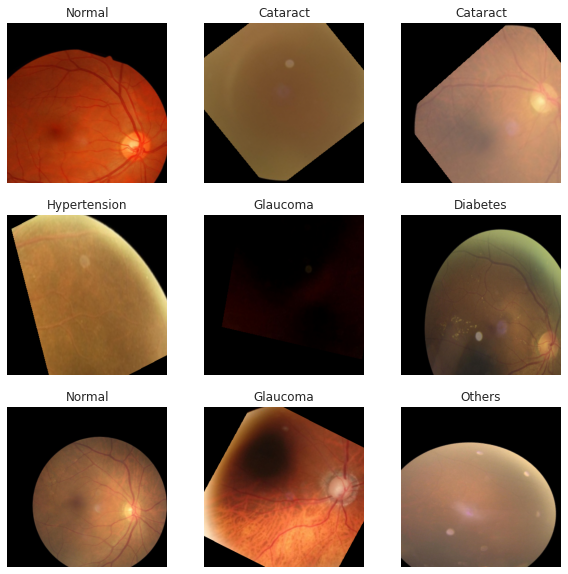

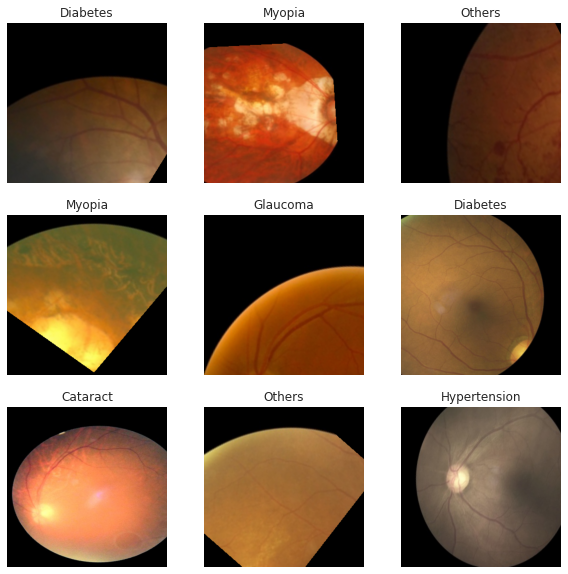

In [9]:

#data_generator.train_generator.class_indices
#tf.keras.applications.xception.preprocess_input
#tf.keras.applications.imagenet_utils.preprocess_input
def create_data_generator(visualize_train=True, visualize_test=True):
  # Création des dataframe train et valid
  odir_df = OdirDataframe.create_multiclass_dataframe()
  #train_df, valid_df, test_df = odir_df.train_valid_test_split(sample=None)
  data_generator = OdirDataGenerator.from_odir_dataframe(odir_df, data_augmentation=True)

  # Visualize Data
  if visualize_train:
    data_generator.visualize()
  if visualize_test:
    data_generator.visualize(data_test=True)

  return data_generator


data_generator = create_data_generator(True, True)



### 2. Instanciation du modèle

In [20]:
from keras import backend as K 
import numpy as np
import time
import pickle # Saving history


odir_model, model = OdirModel.instanciate_and_setup_model(data_generator, class_mode='multiclass', name='multiclass')



Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 149, 149, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 149, 149, 32  128        ['block1_conv1[0][0]']           
 ation)                         )                                                             

### 3. Training et évaluation du modèle

**Tranfert learning**

---



Epoch 1/50
428/428 [==============================] - 175s 381ms/step - loss: 3.2961 - accuracy: 0.3849 - val_loss: 1.4690 - val_accuracy: 0.4904
Epoch 2/50
428/428 [==============================] - 159s 372ms/step - loss: 1.6353 - accuracy: 0.4466 - val_loss: 1.3275 - val_accuracy: 0.5397
Epoch 3/50
428/428 [==============================] - 162s 378ms/step - loss: 1.4715 - accuracy: 0.4806 - val_loss: 1.2413 - val_accuracy: 0.5394
Epoch 4/50
428/428 [==============================] - 159s 371ms/step - loss: 1.3408 - accuracy: 0.5232 - val_loss: 1.1371 - val_accuracy: 0.5882
Epoch 5/50
428/428 [==============================] - 159s 372ms/step - loss: 1.2126 - accuracy: 0.5611 - val_loss: 1.0935 - val_accuracy: 0.6028
Epoch 6/50
428/428 [==============================] - 160s 373ms/step - loss: 1.1654 - accuracy: 0.5783 - val_loss: 1.0777 - val_accuracy: 0.6273
Epoch 7/50
428/428 [==============================] - 160s 374ms/step - loss: 1.1288 - accuracy: 0.5917 - val_loss: 1.0573 -

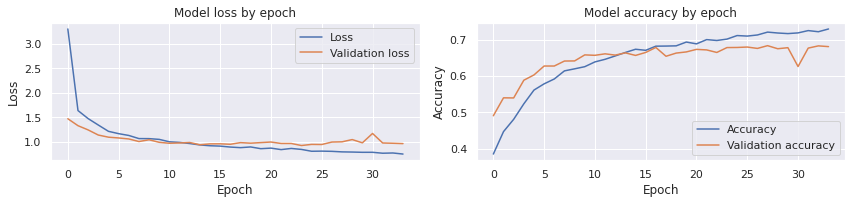

In [ ]:

EPOCHS = 50

training_history = odir_model.train(model, epochs=EPOCHS)
odir_evaluator = OdirModelEvaluator(model, training_history)
odir_evaluator.plot_history()
training_history_file_name = os.path.join(MODEL_OUTPUT_PATH, f'{odir_model.model_last_path[:-3]}.npy')
np.save(training_history_file_name, training_history.history)
training_history_load = np.load(training_history_file_name,allow_pickle='TRUE').item()


training_history_file_name = os.path.join(MODEL_OUTPUT_PATH, f'{odir_model.model_last_path[:-3]}_HistoryDict')
with open(training_history_file_name, 'wb') as hist_save_file:
  pickle.dump(training_history.history, hist_save_file)

dict_history = None
with open(training_history_file_name, 'rb') as hist_read_file:
  dict_history = pickle.load(hist_read_file)


In [ ]:
# Load model



**Fine Tuning**

---



83683744/83683744 [==============================] - 0s 0us/step
Training with fine tunning
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 149, 149, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 149, 149, 32  128        ['block1_conv1[0][0]']           
 a

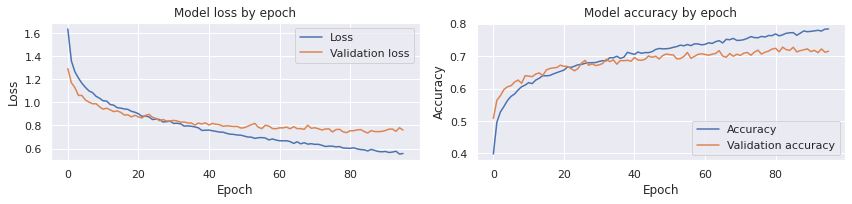

In [ ]:
# Saving history
import numpy as np
import time
import pickle
EPOCHS = 100
odir_model, model = instanciate_and_setup_model(class_mode='multiclass', name='multiclass_fine_tuning', layer_trainable_index=126)
training_history = odir_model.train(model, epochs=EPOCHS)
odir_evaluator = OdirModelEvaluator(model, training_history)
odir_evaluator.plot_history()
training_history_file_name = os.path.join(MODEL_OUTPUT_PATH, f'{odir_model.model_last_path[:-3]}.npy')
np.save(training_history_file_name, training_history.history)
training_history_load = np.load(training_history_file_name,allow_pickle='TRUE').item()


training_history_file_name = os.path.join(MODEL_OUTPUT_PATH, f'{odir_model.model_last_path[:-3]}_HistoryDict')
with open(training_history_file_name, 'wb') as hist_save_file:
  pickle.dump(training_history.history, hist_save_file)

dict_history = None
with open(training_history_file_name, 'rb') as hist_read_file:
#   dict_history = pickle.load(hist_read_file)

## II- Multi-Label Classification

### Exemple d'entrainement du modèle

In [ ]:
from keras.models import load_model
odir_df_ex = OdirDataframe.create_multilabel_dataframe()
#OdirDataframe.add_label_col(odir_df_ex.all_df)
#odir_df_ex.all_df.head()
#df_sample = odir_df_ex.all_df 
df_sample = odir_df_ex.sample()
#train_df_ex, valid_df_ex, test_df_ex = odir_df_ex.train_valid_test_split(sample=100)
#df_sample['Label'].value_counts() 
df_sample.head()

ID  Normal  Diabetes  \
4424  /content/drive/MyDrive/Colab Notebooks/ODIR-5K...       1         0   
994   /content/drive/MyDrive/Colab Notebooks/ODIR-5K...       1         0   
4018  /content/drive/MyDrive/Colab Notebooks/ODIR-5K...       1         0   
6085  /content/drive/MyDrive/Colab Notebooks/ODIR-5K...       1         0   
4503  /content/drive/MyDrive/Colab Notebooks/ODIR-5K...       1         0   

      Glaucoma  Cataract  AMD  Hypertension  Myopia  Others  
4424         0         0    0             0       0       0  
994          0         0    0             0       0       0  
4018         0         0    0             0       0       0  
6085         0         0    0             0       0       0  
4503         0         0    0             0       0       0

class_mode = multilabel
class_mode = raw
Found 512 validated image filenames.
Training data generated
Found 128 validated image filenames.
Validation data generated
Found 160 validated image filenames.
Test data generated
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 299, 299, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 299, 299, 3)       0         
                                                                 
 xception (Functional)       (None, 10, 10, 2048)      20861480  
                                                                 
 flatten (Flatten)           (None, 204800)            0         
                                                                 
 dropout (Dropout)           (None, 204800)            0         
                                     

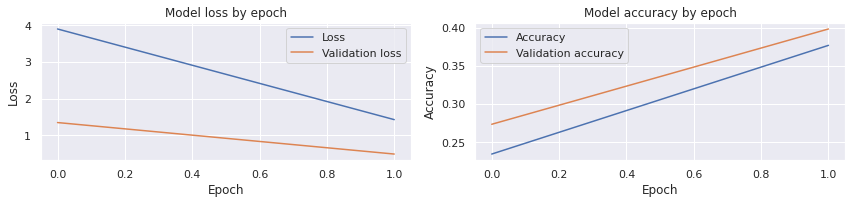

In [ ]:
from keras import backend as K 

#1. Création des dataframe train et valid
data_generator_ex = OdirDataGenerator.from_odir_dataframe(odir_df_ex, sample=100)

#2. Instantiation du modèle
# Clear the old session.
K.clear_session()
odir_model_ex = OdirModel(data_generator_ex, class_mode='multilabel', name='multilabel')
model_ex = odir_model_ex.create_model()
odir_model_ex.summary(model_ex)
odir_model_ex.plot_model(model_ex)
tf.keras.utils.plot_model(model_ex, show_shapes=True, show_layer_names=True)

#3. Entrainement et évaluation du modèle
odir_model_ex.compile(model_ex, trainable=False)
training_ex = odir_model_ex.train(model_ex, epochs=2)
odir_evaluator_ex = OdirModelEvaluator(model_ex, training_ex)
odir_evaluator_ex.plot_history()


# model_h5_path = os.path.join(MODEL_OUTPUT_PATH, 'odir_xception_weights_True.h5')
# model = load_model('odir_xception_weights_True.h5')
#model.trainable = True
# model.summary()

# new_model.compile(
#     optimizer=keras.optimizers.Adam(1e-6),  # Low learning rate
#     loss=keras.losses.BinaryCrossentropy(from_logits=True),
#     metrics=['accuracy']
# )

# epochs = 10

# STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
# STEP_SIZE_VALID=valid_generator.n//valid_generator.batch_size
# history2 = new_model.fit(train_generator,
#                      steps_per_epoch=STEP_SIZE_TRAIN,
#                      validation_data=valid_generator,
#                      validation_steps=STEP_SIZE_VALID,
#                      epochs=epochs)

# print("saving model_weights_trainable")
# model.save(os.path.join(MODEL_OUTPUT_PATH, 'model_weights_trainable.h5'))

### 1. Création des dataframe d'entrainement, de validation et de test

Found 14022 validated image filenames.
Training data generated
Found 3506 validated image filenames.
Validation data generated
Found 4383 validated image filenames.
Test data generated


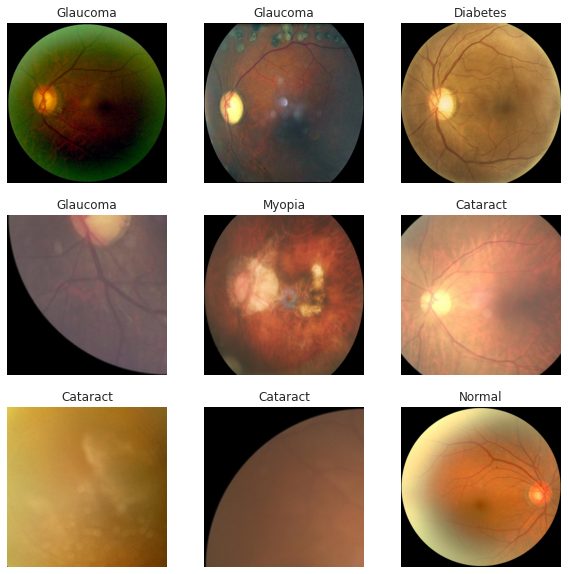

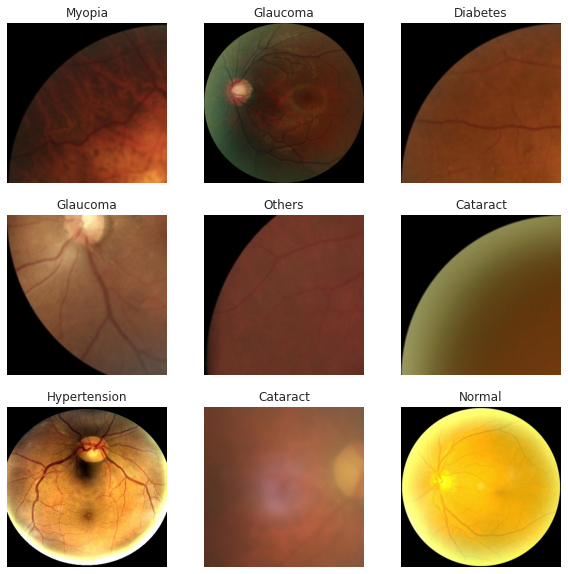

In [ ]:
# Création des dataframe train et valid
odir_df = OdirDataframe.create_multilabel_dataframe()
#train_df, valid_df, test_df = odir_df.train_valid_test_split(sample=None)
data_generator = OdirDataGenerator.from_odir_dataframe(odir_df)

# Visualize Data
data_generator.visualize()
data_generator.visualize(data_test=True)

### 2. Instanciation du modèle

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 299, 299, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 299, 299, 3)       0         
                                                                 
 xception (Functional)       (None, 10, 10, 2048)      20861480  
                                                                 
 flatten (Flatten)           (None, 204800)            0         
                                                                 
 dropout (Dropout)           (None, 204800)            0         
                                                                 
 dense (Dense)               (None, 1028)              210535428 
                                                                 
 dropout_1 (Dropout)         (None, 1028)              0     

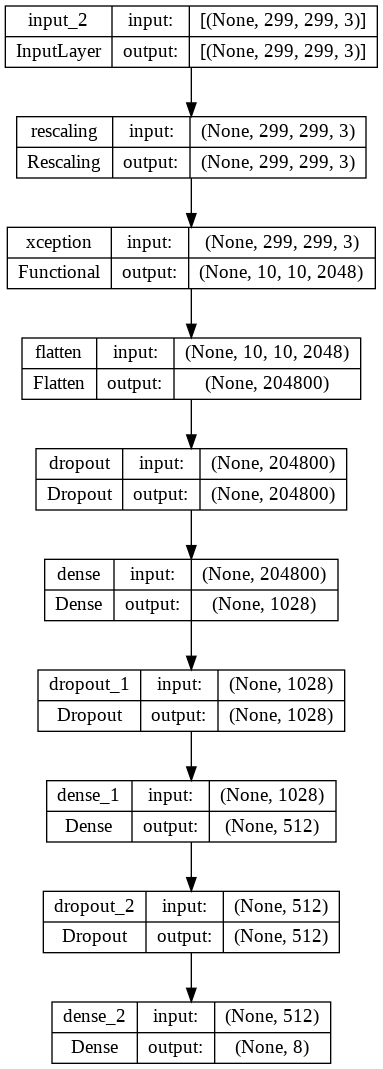

In [ ]:
from keras import backend as K 
# Clear the old session.
K.clear_session()
odir_model = OdirModel(data_generator, class_mode='multilabel', name='multilabel')
model = odir_model.create_model()
odir_model.summary(model)
odir_model.plot_model(model)
keras.utils.plot_model(model, show_shapes=True, show_layer_names=True)

### 2. Training et évaluation du modèle

Epoch 1/50
438/438 [==============================] - 3368s 8s/step - loss: 0.5292 - accuracy: 0.4026 - val_loss: 0.2643 - val_accuracy: 0.5525
Epoch 2/50
438/438 [==============================] - 60s 136ms/step - loss: 0.2933 - accuracy: 0.4885 - val_loss: 0.2390 - val_accuracy: 0.6021
Epoch 3/50
438/438 [==============================] - 60s 138ms/step - loss: 0.2630 - accuracy: 0.5247 - val_loss: 0.2198 - val_accuracy: 0.6299
Epoch 4/50
438/438 [==============================] - 61s 139ms/step - loss: 0.2410 - accuracy: 0.5617 - val_loss: 0.2165 - val_accuracy: 0.6356
Epoch 5/50
438/438 [==============================] - 62s 141ms/step - loss: 0.2246 - accuracy: 0.5981 - val_loss: 0.2073 - val_accuracy: 0.6551
Epoch 6/50
438/438 [==============================] - 59s 135ms/step - loss: 0.2163 - accuracy: 0.6083 - val_loss: 0.2123 - val_accuracy: 0.6508
Epoch 7/50
438/438 [==============================] - 59s 134ms/step - loss: 0.2061 - accuracy: 0.6218 - val_loss: 0.2094 - val_acc

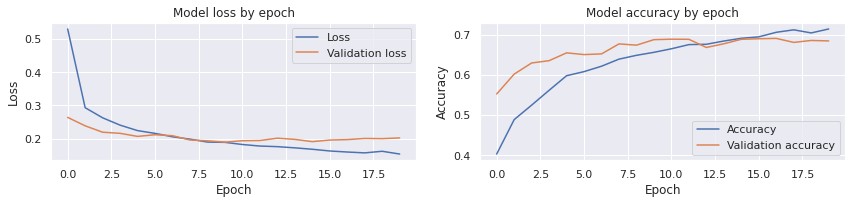

In [ ]:
import numpy as np
import time
import pickle
EPOCHS = 50
odir_model.compile(model, trainable=False)
training_history = odir_model.train(model, epochs=EPOCHS)
odir_evaluator = OdirModelEvaluator(model, training_history)
odir_evaluator.plot_history()
training_history_file_name = os.path.join(MODEL_OUTPUT_PATH, f'{odir_model.model_last_path[:-3]}.npy')
np.save(training_history_file_name, training_history.history)
training_history_load = np.load(training_history_file_name,allow_pickle='TRUE').item()


training_history_file_name = os.path.join(MODEL_OUTPUT_PATH, f'{odir_model.model_last_path[:-3]}_HistoryDict')
with open(training_history_file_name, 'wb') as hist_save_file:
  pickle.dump(training_history.history, hist_save_file)

dict_history = None
with open(training_history_file_name, 'rb') as hist_read_file:
  dict_history = pickle.load(hist_read_file)


# Prédiction

## 1. Chargement du modèle multiclass fine tuning





In [10]:
# load model
# saving model at: /content/drive/MyDrive/Colab Notebooks/model/odir_model_weights_Xception_2022-10-21_multiclass_fine_tuning.h5
model_ft = OdirModel.load_model('odir_model_weights_Xception_2022-10-21_multiclass_fine_tuning.h5')

# We can use above
# test_generator = data_generator.test_generator
# STEP_SIZE_TEST=test_generator.n//test_generator.batch_size
# print(STEP_SIZE_TEST)

# test_generator.reset()
# pred=model_ft.predict(test_generator,
# steps=STEP_SIZE_TEST,
# verbose=1)
#predicted_class_indices=np.argmax(pred,axis=1)
# labels = (train_generator.class_indices)
# labels = dict((v,k) for k,v in labels.items())
# predictions = [labels[k] for k in predicted_class_indices]
# filenames=test_generator.filenames
# results=pd.DataFrame({"Filename":filenames,
#                       "Predictions":predictions})
# results.to_csv("results.csv",index=False)

## 2. Prédiction et Evaluation

In [11]:
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
from tqdm import tqdm

def model_report(test_generator, model):
  y_pred = []
  y_true = [] 
  loss_eval = []
  accuracy_eval = []
  len_gen = len(test_generator)
  for i in tqdm(range(len_gen)):
    X_test, y_test = test_generator.next()
    test_pred = model_ft.predict(X_test)
    list_eval = model_ft.evaluate(X_test, y_test)
    loss_eval.append(list_eval[0])
    accuracy_eval.append(list_eval[1])
    y_pred.append(test_pred.argmax(axis = 1))
    y_true.append(y_test)

  return y_true, y_pred, loss_eval, accuracy_eval
  
y_true, y_pred, loss_eval, accuracy_eval = model_report(data_generator.test_generator, model_ft)
  

  0%|          | 0/134 [00:00<?, ?it/s]

1/1 [==============================] - 12s 12s/step - loss: 0.3783 - accuracy: 0.8438


  1%|          | 1/134 [00:50<1:52:02, 50.54s/it]

1/1 [==============================] - 11s 11s/step - loss: 0.7002 - accuracy: 0.7188


  1%|▏         | 2/134 [01:36<1:45:22, 47.89s/it]

1/1 [==============================] - 11s 11s/step - loss: 0.6382 - accuracy: 0.7812


  2%|▏         | 3/134 [02:22<1:42:47, 47.08s/it]

1/1 [==============================] - 11s 11s/step - loss: 0.7646 - accuracy: 0.7812


  3%|▎         | 4/134 [03:00<1:34:08, 43.45s/it]

1/1 [==============================] - 11s 11s/step - loss: 0.4768 - accuracy: 0.7500


  4%|▎         | 5/134 [03:29<1:22:15, 38.26s/it]

1/1 [==============================] - 11s 11s/step - loss: 0.9568 - accuracy: 0.6875


  4%|▍         | 6/134 [04:08<1:21:50, 38.36s/it]

1/1 [==============================] - 11s 11s/step - loss: 0.9065 - accuracy: 0.6562


  5%|▌         | 7/134 [04:37<1:14:54, 35.39s/it]

1/1 [==============================] - 11s 11s/step - loss: 0.8596 - accuracy: 0.6875


  6%|▌         | 8/134 [05:16<1:16:27, 36.41s/it]

1/1 [==============================] - 11s 11s/step - loss: 0.6056 - accuracy: 0.7812


  7%|▋         | 9/134 [05:55<1:17:30, 37.20s/it]

1/1 [==============================] - 11s 11s/step - loss: 0.9121 - accuracy: 0.5625


  7%|▋         | 10/134 [06:33<1:17:37, 37.56s/it]

1/1 [==============================] - 11s 11s/step - loss: 1.0968 - accuracy: 0.7188


  8%|▊         | 11/134 [07:20<1:22:57, 40.46s/it]

1/1 [==============================] - 11s 11s/step - loss: 0.6940 - accuracy: 0.7188


  9%|▉         | 12/134 [07:58<1:20:47, 39.73s/it]

1/1 [==============================] - 11s 11s/step - loss: 0.4206 - accuracy: 0.7812


 10%|▉         | 13/134 [08:27<1:13:28, 36.43s/it]

1/1 [==============================] - 11s 11s/step - loss: 0.6323 - accuracy: 0.7500


 10%|█         | 14/134 [09:05<1:13:52, 36.94s/it]

1/1 [==============================] - 12s 12s/step - loss: 0.2605 - accuracy: 0.8750


 11%|█         | 15/134 [09:46<1:15:58, 38.31s/it]

1/1 [==============================] - 11s 11s/step - loss: 0.3978 - accuracy: 0.7812


 12%|█▏        | 16/134 [10:34<1:20:41, 41.03s/it]

1/1 [==============================] - 11s 11s/step - loss: 0.8511 - accuracy: 0.6875


 13%|█▎        | 17/134 [11:12<1:18:13, 40.12s/it]

1/1 [==============================] - 11s 11s/step - loss: 0.6171 - accuracy: 0.7812


 13%|█▎        | 18/134 [12:00<1:22:12, 42.52s/it]

1/1 [==============================] - 11s 11s/step - loss: 0.7434 - accuracy: 0.7500


 14%|█▍        | 19/134 [12:47<1:24:16, 43.97s/it]

1/1 [==============================] - 11s 11s/step - loss: 0.4829 - accuracy: 0.7812


 15%|█▍        | 20/134 [13:16<1:14:56, 39.45s/it]

1/1 [==============================] - 11s 11s/step - loss: 0.6610 - accuracy: 0.6562


 16%|█▌        | 21/134 [13:45<1:08:02, 36.13s/it]

1/1 [==============================] - 11s 11s/step - loss: 0.7063 - accuracy: 0.7812


 16%|█▋        | 22/134 [14:23<1:08:56, 36.94s/it]

1/1 [==============================] - 12s 12s/step - loss: 0.6117 - accuracy: 0.8438


 17%|█▋        | 23/134 [15:11<1:14:22, 40.21s/it]

1/1 [==============================] - 11s 11s/step - loss: 0.4875 - accuracy: 0.7500


 18%|█▊        | 24/134 [15:50<1:12:44, 39.68s/it]

1/1 [==============================] - 11s 11s/step - loss: 1.1123 - accuracy: 0.6250


 19%|█▊        | 25/134 [16:37<1:16:03, 41.87s/it]

1/1 [==============================] - 11s 11s/step - loss: 0.8194 - accuracy: 0.6562


 19%|█▉        | 26/134 [17:15<1:13:22, 40.76s/it]

1/1 [==============================] - 11s 11s/step - loss: 0.5500 - accuracy: 0.7812


 20%|██        | 27/134 [17:53<1:11:14, 39.95s/it]

1/1 [==============================] - 11s 11s/step - loss: 0.7339 - accuracy: 0.8125


 21%|██        | 28/134 [18:31<1:09:52, 39.55s/it]

1/1 [==============================] - 11s 11s/step - loss: 0.4943 - accuracy: 0.8125


 22%|██▏       | 29/134 [19:10<1:08:31, 39.15s/it]

1/1 [==============================] - 12s 12s/step - loss: 0.5710 - accuracy: 0.8125


 22%|██▏       | 30/134 [19:49<1:07:50, 39.14s/it]

1/1 [==============================] - 11s 11s/step - loss: 0.7736 - accuracy: 0.6875


 23%|██▎       | 31/134 [20:27<1:06:33, 38.77s/it]

1/1 [==============================] - 11s 11s/step - loss: 0.6938 - accuracy: 0.8125


 24%|██▍       | 32/134 [21:15<1:10:33, 41.50s/it]

1/1 [==============================] - 11s 11s/step - loss: 0.5878 - accuracy: 0.6875


 25%|██▍       | 33/134 [21:53<1:08:27, 40.67s/it]

1/1 [==============================] - 11s 11s/step - loss: 0.9028 - accuracy: 0.6250


 25%|██▌       | 34/134 [22:33<1:07:32, 40.52s/it]

1/1 [==============================] - 11s 11s/step - loss: 0.6816 - accuracy: 0.6250


 26%|██▌       | 35/134 [23:11<1:05:33, 39.73s/it]

1/1 [==============================] - 11s 11s/step - loss: 0.5772 - accuracy: 0.7500


 27%|██▋       | 36/134 [23:40<59:37, 36.51s/it]  

1/1 [==============================] - 11s 11s/step - loss: 0.6937 - accuracy: 0.7500


 28%|██▊       | 37/134 [24:19<59:57, 37.09s/it]

1/1 [==============================] - 11s 11s/step - loss: 0.6965 - accuracy: 0.7500


 28%|██▊       | 38/134 [24:57<59:49, 37.39s/it]

1/1 [==============================] - 11s 11s/step - loss: 0.7059 - accuracy: 0.7500


 29%|██▉       | 39/134 [25:35<59:27, 37.55s/it]

1/1 [==============================] - 11s 11s/step - loss: 0.6300 - accuracy: 0.7812


 30%|██▉       | 40/134 [26:13<58:54, 37.61s/it]

1/1 [==============================] - 11s 11s/step - loss: 0.6883 - accuracy: 0.8125


 31%|███       | 41/134 [27:00<1:02:42, 40.45s/it]

1/1 [==============================] - 11s 11s/step - loss: 0.5314 - accuracy: 0.7500


 31%|███▏      | 42/134 [27:38<1:01:03, 39.82s/it]

1/1 [==============================] - 11s 11s/step - loss: 0.5160 - accuracy: 0.8438


 32%|███▏      | 43/134 [28:07<55:17, 36.46s/it]  

1/1 [==============================] - 11s 11s/step - loss: 0.6778 - accuracy: 0.8125


 33%|███▎      | 44/134 [28:54<59:41, 39.79s/it]

1/1 [==============================] - 11s 11s/step - loss: 0.6817 - accuracy: 0.6875


 34%|███▎      | 45/134 [29:32<58:17, 39.30s/it]

1/1 [==============================] - 11s 11s/step - loss: 0.6523 - accuracy: 0.6562


 34%|███▍      | 46/134 [30:21<1:01:37, 42.01s/it]

1/1 [==============================] - 11s 11s/step - loss: 0.7527 - accuracy: 0.6875


 35%|███▌      | 47/134 [31:08<1:03:20, 43.68s/it]

1/1 [==============================] - 11s 11s/step - loss: 0.5344 - accuracy: 0.7500


 36%|███▌      | 48/134 [31:47<1:00:23, 42.14s/it]

1/1 [==============================] - 11s 11s/step - loss: 0.7033 - accuracy: 0.7500


 37%|███▋      | 49/134 [32:34<1:02:00, 43.77s/it]

1/1 [==============================] - 11s 11s/step - loss: 0.5519 - accuracy: 0.8125


 37%|███▋      | 50/134 [33:21<1:02:30, 44.65s/it]

1/1 [==============================] - 11s 11s/step - loss: 0.7141 - accuracy: 0.7188


 38%|███▊      | 51/134 [33:50<55:04, 39.82s/it]  

1/1 [==============================] - 11s 11s/step - loss: 0.6820 - accuracy: 0.7812


 39%|███▉      | 52/134 [34:28<53:40, 39.28s/it]

1/1 [==============================] - 11s 11s/step - loss: 0.8602 - accuracy: 0.7188


 40%|███▉      | 53/134 [35:14<56:05, 41.55s/it]

1/1 [==============================] - 11s 11s/step - loss: 0.5691 - accuracy: 0.7188


 40%|████      | 54/134 [35:53<54:11, 40.64s/it]

1/1 [==============================] - 11s 11s/step - loss: 0.5533 - accuracy: 0.8125


 41%|████      | 55/134 [36:34<53:35, 40.70s/it]

1/1 [==============================] - 11s 11s/step - loss: 0.5958 - accuracy: 0.7812


 42%|████▏     | 56/134 [37:03<48:20, 37.18s/it]

1/1 [==============================] - 11s 11s/step - loss: 1.2372 - accuracy: 0.6562


 43%|████▎     | 57/134 [37:41<47:59, 37.40s/it]

1/1 [==============================] - 11s 11s/step - loss: 0.5704 - accuracy: 0.7500


 43%|████▎     | 58/134 [38:28<51:02, 40.29s/it]

1/1 [==============================] - 11s 11s/step - loss: 0.6856 - accuracy: 0.7500


 44%|████▍     | 59/134 [39:06<49:45, 39.80s/it]

1/1 [==============================] - 11s 11s/step - loss: 0.7000 - accuracy: 0.6562


 45%|████▍     | 60/134 [39:45<48:27, 39.29s/it]

1/1 [==============================] - 11s 11s/step - loss: 0.6314 - accuracy: 0.6875


 46%|████▌     | 61/134 [40:23<47:27, 39.00s/it]

1/1 [==============================] - 11s 11s/step - loss: 0.5691 - accuracy: 0.7500


 46%|████▋     | 62/134 [41:01<46:27, 38.72s/it]

1/1 [==============================] - 11s 11s/step - loss: 0.6371 - accuracy: 0.7500


 47%|████▋     | 63/134 [41:48<48:51, 41.29s/it]

1/1 [==============================] - 11s 11s/step - loss: 0.6301 - accuracy: 0.7500


 48%|████▊     | 64/134 [42:36<50:24, 43.21s/it]

1/1 [==============================] - 11s 11s/step - loss: 0.8553 - accuracy: 0.7188


 49%|████▊     | 65/134 [43:17<49:04, 42.68s/it]

1/1 [==============================] - 11s 11s/step - loss: 0.3500 - accuracy: 0.8750


 49%|████▉     | 66/134 [43:56<46:52, 41.36s/it]

1/1 [==============================] - 11s 11s/step - loss: 0.4804 - accuracy: 0.8438


 50%|█████     | 67/134 [44:26<42:30, 38.07s/it]

1/1 [==============================] - 11s 11s/step - loss: 0.5168 - accuracy: 0.8438


 51%|█████     | 68/134 [45:14<45:03, 40.96s/it]

1/1 [==============================] - 11s 11s/step - loss: 0.8346 - accuracy: 0.7188


 51%|█████▏    | 69/134 [46:01<46:30, 42.93s/it]

1/1 [==============================] - 11s 11s/step - loss: 0.8469 - accuracy: 0.7188


 52%|█████▏    | 70/134 [46:39<44:12, 41.44s/it]

1/1 [==============================] - 11s 11s/step - loss: 0.5655 - accuracy: 0.7812


 53%|█████▎    | 71/134 [47:08<39:35, 37.70s/it]

1/1 [==============================] - 11s 11s/step - loss: 0.7187 - accuracy: 0.8125


 54%|█████▎    | 72/134 [47:47<39:10, 37.90s/it]

1/1 [==============================] - 11s 11s/step - loss: 0.5145 - accuracy: 0.8750


 54%|█████▍    | 73/134 [48:25<38:40, 38.05s/it]

1/1 [==============================] - 11s 11s/step - loss: 0.4907 - accuracy: 0.8750


 55%|█████▌    | 74/134 [49:03<38:02, 38.04s/it]

1/1 [==============================] - 11s 11s/step - loss: 0.6588 - accuracy: 0.7812


 56%|█████▌    | 75/134 [49:41<37:24, 38.05s/it]

1/1 [==============================] - 11s 11s/step - loss: 0.5462 - accuracy: 0.7812


 57%|█████▋    | 76/134 [50:28<39:27, 40.83s/it]

1/1 [==============================] - 11s 11s/step - loss: 0.5537 - accuracy: 0.7812


 57%|█████▋    | 77/134 [51:06<38:01, 40.02s/it]

1/1 [==============================] - 11s 11s/step - loss: 0.8304 - accuracy: 0.6250


 58%|█████▊    | 78/134 [51:54<39:19, 42.13s/it]

1/1 [==============================] - 11s 11s/step - loss: 0.6177 - accuracy: 0.7812


 59%|█████▉    | 79/134 [52:41<39:59, 43.63s/it]

1/1 [==============================] - 12s 12s/step - loss: 0.5463 - accuracy: 0.7812


 60%|█████▉    | 80/134 [53:23<38:48, 43.11s/it]

1/1 [==============================] - 12s 12s/step - loss: 0.5145 - accuracy: 0.8438


 60%|██████    | 81/134 [53:53<34:38, 39.22s/it]

1/1 [==============================] - 11s 11s/step - loss: 0.5052 - accuracy: 0.8125


 61%|██████    | 82/134 [54:31<33:41, 38.88s/it]

1/1 [==============================] - 11s 11s/step - loss: 0.7824 - accuracy: 0.6875


 62%|██████▏   | 83/134 [55:08<32:43, 38.50s/it]

1/1 [==============================] - 11s 11s/step - loss: 0.9661 - accuracy: 0.7188


 63%|██████▎   | 84/134 [55:56<34:15, 41.10s/it]

1/1 [==============================] - 16s 16s/step - loss: 0.4977 - accuracy: 0.8125


 63%|██████▎   | 85/134 [56:43<35:05, 42.98s/it]

1/1 [==============================] - 12s 12s/step - loss: 0.3395 - accuracy: 0.9375


 64%|██████▍   | 86/134 [57:21<33:14, 41.56s/it]

1/1 [==============================] - 11s 11s/step - loss: 1.0476 - accuracy: 0.6562


 65%|██████▍   | 87/134 [58:00<31:52, 40.69s/it]

1/1 [==============================] - 11s 11s/step - loss: 0.6699 - accuracy: 0.7812


 66%|██████▌   | 88/134 [58:30<28:43, 37.46s/it]

1/1 [==============================] - 11s 11s/step - loss: 0.5483 - accuracy: 0.7500


 66%|██████▋   | 89/134 [59:08<28:19, 37.77s/it]

1/1 [==============================] - 11s 11s/step - loss: 0.6005 - accuracy: 0.7500


 67%|██████▋   | 90/134 [59:55<29:43, 40.55s/it]

1/1 [==============================] - 12s 12s/step - loss: 0.6185 - accuracy: 0.7500


 68%|██████▊   | 91/134 [1:00:34<28:39, 39.98s/it]

1/1 [==============================] - 11s 11s/step - loss: 0.7533 - accuracy: 0.8125


 69%|██████▊   | 92/134 [1:01:22<29:36, 42.29s/it]

1/1 [==============================] - 11s 11s/step - loss: 0.5431 - accuracy: 0.8125


 69%|██████▉   | 93/134 [1:02:01<28:19, 41.46s/it]

1/1 [==============================] - 11s 11s/step - loss: 0.2977 - accuracy: 0.9062


 70%|███████   | 94/134 [1:02:49<28:50, 43.26s/it]

1/1 [==============================] - 11s 11s/step - loss: 0.3961 - accuracy: 0.7812


 71%|███████   | 95/134 [1:03:27<27:09, 41.78s/it]

1/1 [==============================] - 11s 11s/step - loss: 0.3294 - accuracy: 0.8750


 72%|███████▏  | 96/134 [1:04:06<25:54, 40.90s/it]

1/1 [==============================] - 11s 11s/step - loss: 0.6248 - accuracy: 0.7188


 72%|███████▏  | 97/134 [1:04:44<24:41, 40.04s/it]

1/1 [==============================] - 11s 11s/step - loss: 0.7926 - accuracy: 0.6875


 73%|███████▎  | 98/134 [1:05:13<22:02, 36.73s/it]

1/1 [==============================] - 11s 11s/step - loss: 0.6614 - accuracy: 0.8438


 74%|███████▍  | 99/134 [1:05:51<21:44, 37.26s/it]

1/1 [==============================] - 11s 11s/step - loss: 0.8296 - accuracy: 0.7812


 75%|███████▍  | 100/134 [1:06:39<22:52, 40.35s/it]

1/1 [==============================] - 11s 11s/step - loss: 0.8106 - accuracy: 0.6562


 75%|███████▌  | 101/134 [1:07:26<23:20, 42.43s/it]

1/1 [==============================] - 12s 12s/step - loss: 0.4036 - accuracy: 0.8438


 76%|███████▌  | 102/134 [1:08:04<21:58, 41.19s/it]

1/1 [==============================] - 11s 11s/step - loss: 0.4704 - accuracy: 0.8438


 77%|███████▋  | 103/134 [1:08:43<20:49, 40.31s/it]

1/1 [==============================] - 11s 11s/step - loss: 1.0012 - accuracy: 0.6562


 78%|███████▊  | 104/134 [1:09:30<21:14, 42.47s/it]

1/1 [==============================] - 11s 11s/step - loss: 0.5970 - accuracy: 0.7812


 78%|███████▊  | 105/134 [1:10:18<21:15, 43.97s/it]

1/1 [==============================] - 11s 11s/step - loss: 0.9600 - accuracy: 0.5938


 79%|███████▉  | 106/134 [1:10:47<18:29, 39.63s/it]

1/1 [==============================] - 12s 12s/step - loss: 0.8451 - accuracy: 0.6562


 80%|███████▉  | 107/134 [1:11:26<17:41, 39.30s/it]

1/1 [==============================] - 12s 12s/step - loss: 0.4018 - accuracy: 0.8125


 81%|████████  | 108/134 [1:12:13<18:06, 41.80s/it]

1/1 [==============================] - 11s 11s/step - loss: 0.7264 - accuracy: 0.7500


 81%|████████▏ | 109/134 [1:12:53<17:09, 41.18s/it]

1/1 [==============================] - 11s 11s/step - loss: 0.5661 - accuracy: 0.7188


 82%|████████▏ | 110/134 [1:13:32<16:10, 40.45s/it]

1/1 [==============================] - 11s 11s/step - loss: 0.5024 - accuracy: 0.8125


 83%|████████▎ | 111/134 [1:14:10<15:17, 39.89s/it]

1/1 [==============================] - 11s 11s/step - loss: 0.5032 - accuracy: 0.7812


 84%|████████▎ | 112/134 [1:14:50<14:33, 39.72s/it]

1/1 [==============================] - 11s 11s/step - loss: 0.6213 - accuracy: 0.7188


 84%|████████▍ | 113/134 [1:15:29<13:49, 39.49s/it]

1/1 [==============================] - 11s 11s/step - loss: 0.9292 - accuracy: 0.6562


 85%|████████▌ | 114/134 [1:16:19<14:13, 42.66s/it]

1/1 [==============================] - 11s 11s/step - loss: 0.4896 - accuracy: 0.7812


 86%|████████▌ | 115/134 [1:17:07<14:01, 44.28s/it]

1/1 [==============================] - 11s 11s/step - loss: 0.9847 - accuracy: 0.6562


 87%|████████▋ | 116/134 [1:17:45<12:43, 42.41s/it]

1/1 [==============================] - 11s 11s/step - loss: 0.3290 - accuracy: 0.8125


 87%|████████▋ | 117/134 [1:18:25<11:47, 41.60s/it]

1/1 [==============================] - 12s 12s/step - loss: 0.9338 - accuracy: 0.7500


 88%|████████▊ | 118/134 [1:19:05<10:58, 41.18s/it]

1/1 [==============================] - 11s 11s/step - loss: 0.3456 - accuracy: 0.8438


 89%|████████▉ | 119/134 [1:19:53<10:47, 43.17s/it]

1/1 [==============================] - 11s 11s/step - loss: 0.6165 - accuracy: 0.7188


 90%|████████▉ | 120/134 [1:20:31<09:46, 41.91s/it]

1/1 [==============================] - 11s 11s/step - loss: 0.7419 - accuracy: 0.8125


 90%|█████████ | 121/134 [1:21:11<08:56, 41.28s/it]

1/1 [==============================] - 11s 11s/step - loss: 0.9141 - accuracy: 0.5625


 91%|█████████ | 122/134 [1:22:00<08:41, 43.47s/it]

1/1 [==============================] - 12s 12s/step - loss: 0.4313 - accuracy: 0.8750


 92%|█████████▏| 123/134 [1:22:48<08:14, 45.00s/it]

1/1 [==============================] - 11s 11s/step - loss: 0.6215 - accuracy: 0.6875


 93%|█████████▎| 124/134 [1:23:37<07:41, 46.16s/it]

1/1 [==============================] - 11s 11s/step - loss: 0.6221 - accuracy: 0.7188


 93%|█████████▎| 125/134 [1:24:26<07:01, 46.87s/it]

1/1 [==============================] - 11s 11s/step - loss: 0.6404 - accuracy: 0.7812


 94%|█████████▍| 126/134 [1:25:14<06:19, 47.40s/it]

1/1 [==============================] - 11s 11s/step - loss: 1.0172 - accuracy: 0.6250


 95%|█████████▍| 127/134 [1:25:53<05:13, 44.78s/it]

1/1 [==============================] - 12s 12s/step - loss: 0.8520 - accuracy: 0.7188


 96%|█████████▌| 128/134 [1:26:33<04:19, 43.32s/it]

1/1 [==============================] - 12s 12s/step - loss: 0.7301 - accuracy: 0.8125


 96%|█████████▋| 129/134 [1:27:21<03:43, 44.75s/it]

1/1 [==============================] - 11s 11s/step - loss: 0.7398 - accuracy: 0.8125


 97%|█████████▋| 130/134 [1:28:01<02:53, 43.26s/it]

1/1 [==============================] - 11s 11s/step - loss: 0.6472 - accuracy: 0.6875


 98%|█████████▊| 131/134 [1:28:40<02:06, 42.10s/it]

1/1 [==============================] - 11s 11s/step - loss: 0.6522 - accuracy: 0.6875


 99%|█████████▊| 132/134 [1:29:20<01:22, 41.30s/it]

1/1 [==============================] - 11s 11s/step - loss: 0.5265 - accuracy: 0.7500


 99%|█████████▉| 133/134 [1:30:08<00:43, 43.44s/it]

1/1 [==============================] - 13s 13s/step - loss: 0.6541 - accuracy: 0.7667


100%|██████████| 134/134 [1:30:59<00:00, 40.74s/it]


## 3. Précision et Perte

In [12]:
print('fonction perte du modèle:\n', round(np.mean(loss_eval)*100,2),'%')
print('précision du modèle:\n', round(np.mean(accuracy_eval)*100,2), '%')

fonction perte du modèle:
 65.73 %
précision du modèle:
 75.32 %


## 4. Reporting et Matrice de confusion

In [43]:
y_pred_class = []
y_test_class = []
y_pred_f = []
y_true_f = []
for i in range(len(y_pred)):
  y_pred_f.extend(y_pred[i])
  y_true_f.extend(y_true[i])
  y_pred_class.extend([OdirDataGenerator.get_class_name(x) for x in y_pred[i]])
  y_test_class.extend([OdirDataGenerator.get_class_name(x) for x in y_true[i]])

print(len(y_pred_class))
print(len(y_test_class))


4286
4286


In [44]:
print(classification_report(y_test_class, y_pred_class))

              precision    recall  f1-score   support

         AMD       0.84      0.72      0.78       522
    Cataract       0.96      0.91      0.93       550
    Diabetes       0.54      0.54      0.54       556
    Glaucoma       0.79      0.81      0.80       523
Hypertension       0.86      0.83      0.84       562
      Myopia       0.94      0.97      0.95       521
      Normal       0.62      0.85      0.72       563
      Others       0.49      0.37      0.42       489

    accuracy                           0.75      4286
   macro avg       0.75      0.75      0.75      4286
weighted avg       0.76      0.75      0.75      4286



In [45]:
cnf_matrix = confusion_matrix(y_test_class, y_pred_class)
print(cnf_matrix)

[[374   0  40  15  14  10  20  49]
 [  0 499   4  25   2   2   3  15]
 [ 12   1 299  13  27   0 148  56]
 [  6   6  19 423   6   7  28  28]
 [  9   0  45   8 468   0  17  15]
 [  3   3   1   3   0 505   2   4]
 [  3   1  48   6   4   3 481  17]
 [ 36  11 101  41  25  13  83 179]]


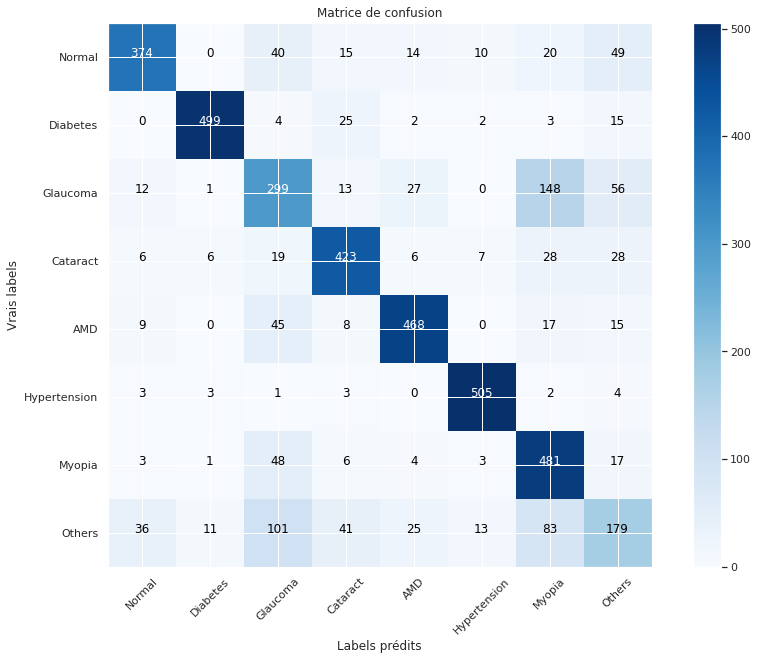

In [46]:
import itertools
cnf_matrix = confusion_matrix(y_test_class, y_pred_class)
# print(cnf_matrix)

###Optionnel: Afficher une matrice de confusion sous forme de tableau coloré
classes = DISEASE_CLASSES

plt.figure(figsize=(15, 10))

plt.imshow(cnf_matrix, interpolation='nearest',cmap='Blues')
plt.title("Matrice de confusion")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)


for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
    plt.text(j, i, cnf_matrix[i, j],
             horizontalalignment="center",
             color="white" if cnf_matrix[i, j] > ( cnf_matrix.max() / 2) else "black")

plt.ylabel('Vrais labels')
plt.xlabel('Labels prédits')
plt.show()


## 5. Sauvegarde prédiction

In [64]:
# save prédiction
filenames=list(map(lambda x: x.replace(ROOT_PATH+'/', ''), data_generator.test_generator.filenames))
#print(filenames[0])
labels = (data_generator.test_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
predicted_class_indices = y_pred_f
predictions = [labels[k] for k in predicted_class_indices]

results=pd.DataFrame({"Filename":filenames, "Predictions":predictions})
results.to_csv(MODEL_OUTPUT_PATH+"/prediction_results.csv",index=False)
results.head()


ODIR-5K_Training_Dataset_Unique_Class_Augmented_299/174_left_6_3_14_5.jpg


Filename Predictions
0  ODIR-5K_Training_Dataset_Unique_Class_Augmente...           6
1  ODIR-5K_Training_Dataset_Unique_Class_Augmente...           6
2  ODIR-5K_Training_Dataset_Cropped_299/3041_righ...           0
3  ODIR-5K_Training_Dataset_Unique_Class_Augmente...           5
4  ODIR-5K_Training_Dataset_Unique_Class_Augmente...           6

## 7. Prédiction avec images

1/1 [==============================] - 1s 501ms/step


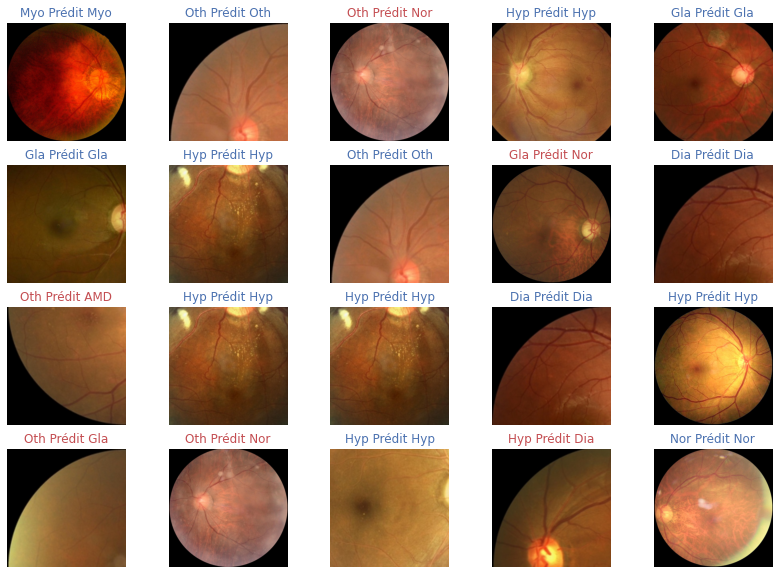

In [89]:
import matplotlib.pyplot as plt
%matplotlib inline
def plot_prediction(test_generator, model, rows=4, cols=5):
  fig, axs = plt.subplots(rows, cols, figsize=(14, 10))
  idx = np.random.randint(0, len(test_generator))
  X_test_batch = None
  y_test_batch = None
  for i in range(idx+1):
    X_test_batch, y_test_batch = test_generator.next()
  class_names = list(map(lambda x: x[:3], DISEASE_CLASSES))
 
  for row in range(rows):
    for col in range(cols):
      idx = np.random.randint(0, len(X_test_batch))
      X_test_idx = np.array([X_test_batch[idx]], dtype=np.float32)
      y_test_idx = y_test_batch[idx]
      
      y_pred_idx = model_ft.predict(X_test_idx)
      #eval_idx = model_ft.evaluate(X_test_idx, y_test_idx)
      img = OdirDataGenerator.prepare_image_for_viz(X_test_batch[idx])
      
      label_true = OdirDataGenerator.get_class_name(y_test_idx, class_names=class_names)
      label_pred = OdirDataGenerator.get_class_name(y_pred_idx.argmax(axis = 1),class_names=class_names)
      
      axs[row, col].imshow(img.astype('uint8'))
      axs[row, col].axis('off')
      fg_color = 'b'
      if label_true != label_pred:
        fg_color = 'r'
      axs[row, col].set_title('{} Prédit {}'.format(label_true, label_pred), color=fg_color)

# test_generator = data_generator.test_generator
data_generator.test_generator.reset()
plot_prediction(data_generator.test_generator,  model_ft)
      